<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Описание" data-toc-modified-id="Описание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Основная часть</a></span><ul class="toc-item"><li><span><a href="#1.-DAU" data-toc-modified-id="1.-DAU-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1. DAU</a></span></li><li><span><a href="#2.-CTR" data-toc-modified-id="2.-CTR-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2. CTR</a></span></li><li><span><a href="#3.-Число-просмотров" data-toc-modified-id="3.-Число-просмотров-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3. Число просмотров</a></span></li><li><span><a href="#4.-Уникальные-просматриваемые-посты" data-toc-modified-id="4.-Уникальные-просматриваемые-посты-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>4. Уникальные просматриваемые посты</a></span></li><li><span><a href="#5.-Новые-посты" data-toc-modified-id="5.-Новые-посты-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>5. Новые посты</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Описание" data-toc-modified-id="Описание-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Описание</a></span><ul class="toc-item"><li><span><a href="#Построение-моделей-без-регрессоров" data-toc-modified-id="Построение-моделей-без-регрессоров-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Построение моделей без регрессоров</a></span></li><li><span><a href="#MAP" data-toc-modified-id="MAP-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>MAP</a></span><ul class="toc-item"><li><span><a href="#MCMC" data-toc-modified-id="MCMC-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>MCMC</a></span></li></ul></li><li><span><a href="#Проверка-качества-моделей" data-toc-modified-id="Проверка-качества-моделей-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Проверка качества моделей</a></span><ul class="toc-item"><li><span><a href="#Проверка-MCMC" data-toc-modified-id="Проверка-MCMC-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Проверка MCMC</a></span></li></ul></li><li><span><a href="#Модель-с-регрессором" data-toc-modified-id="Модель-с-регрессором-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Модель с регрессором</a></span><ul class="toc-item"><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Регуляризация</a></span></li></ul></li><li><span><a href="#Проверка-качества-моделей" data-toc-modified-id="Проверка-качества-моделей-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Проверка качества моделей</a></span><ul class="toc-item"><li><span><a href="#BIC" data-toc-modified-id="BIC-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>BIC</a></span></li><li><span><a href="#Предсказание-модели" data-toc-modified-id="Предсказание-модели-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Предсказание модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# Прогнозирование метрик

## Задание 1

## Описание 

Поддерживать и стимулировать пользовательскую активность – важная задача для продукта, подобного нашему. Для этого команда маркетологов решила организовать флэшмоб в ленте новостей: участники должны сделать пост, где они рассказывают какой-то интересный факт о себе, и опубликовать его с хэштегом. Три поста, собравших наибольшее число лайков, получают призы.

Задача – оценить эффективность этого мероприятия.

Проверим повлиял ли флэшмоб на следующие метрики:
* DAU
* CTR
* Число просмотров
* Уникальные просматриваемые посты
* Новые посты 

Изменение метрик будем проверять при помощи CausalImpact.

## Основная часть

Импортируем все необходимые библиотеки.

In [10]:
import pandas as pd
import pandahouse as ph  
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az 

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components  
from orbit.utils.params_tuning import grid_search_orbit 
from orbit.diagnostics.backtest import BackTester 
from orbit.diagnostics.metrics import rmsse, mae
from orbit.eda import eda_plot

import tensorflow as tf
import tensorflow_probability as tfp
from causalimpact import CausalImpact


Настроим размер графиков.

In [11]:
sns.set(rc={'figure.figsize':(16,10)}, style="whitegrid")

### 1. DAU

Отберем данные, необходимых для дальшейшей работы. Сохраним результат в датафрейм df_dau.

In [13]:
q = """
SELECT toDate(time) AS date,
       COUNT(DISTINCT user_id) AS dau
FROM {db}.feed_actions 
GROUP BY date
"""

df_dau = ph.read_clickhouse(q, connection=connection)
df_dau.set_index('date', inplace=True, drop=False)

Посмотрим на первые пять строк датафрейма df_dau.

In [14]:
df_dau.head()

,date,dau
date,,
2024-08-31,2024-08-31,878
2024-09-01,2024-09-01,2238
2024-09-02,2024-09-02,3105
2024-09-03,2024-09-03,3721
2024-09-04,2024-09-04,4617


Посмотрим глазами на метрику.

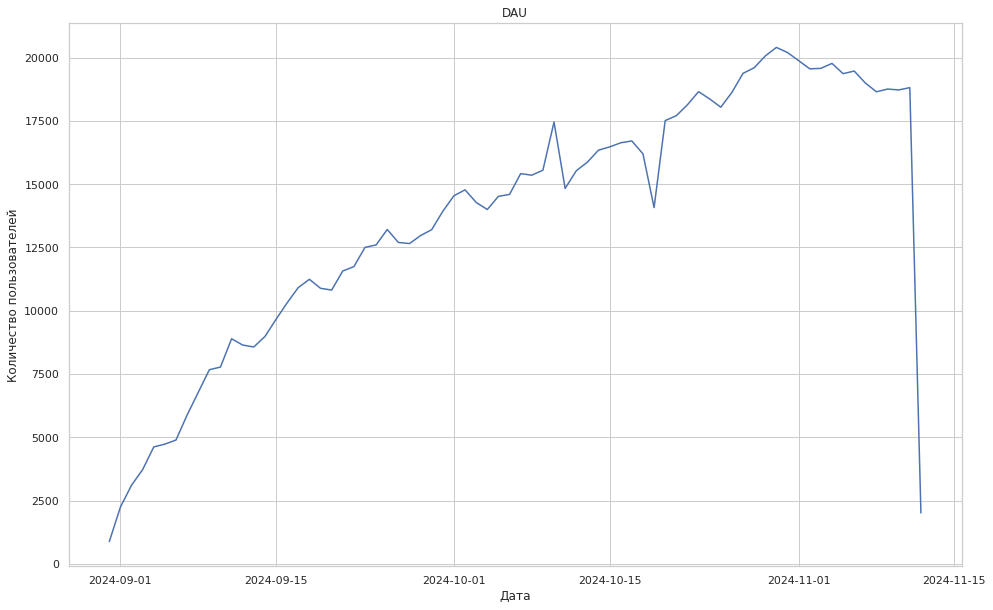

In [15]:
sns.lineplot(x='date', y='dau', data=df_dau)
plt.title('DAU')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей');

Установим диапазоны дат для пре- и пост- периодов.

In [16]:
pre_period = [pd.Timestamp('2024-08-31'), pd.Timestamp('2024-10-10')]
post_period = [pd.Timestamp('2024-10-11'), pd.Timestamp('2024-10-17')]

Создадим модель CausalImpact для анализа DAU.

In [17]:
impact_dau = CausalImpact(data=df_dau[['dau']], pre_period=pre_period, post_period=post_period)

2024-11-11 22:37:46.522036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:37:46.542352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:37:47.014915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


2024-11-11 22:37:59.488683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-11-11 22:37:59.556671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

Рисуем результат.

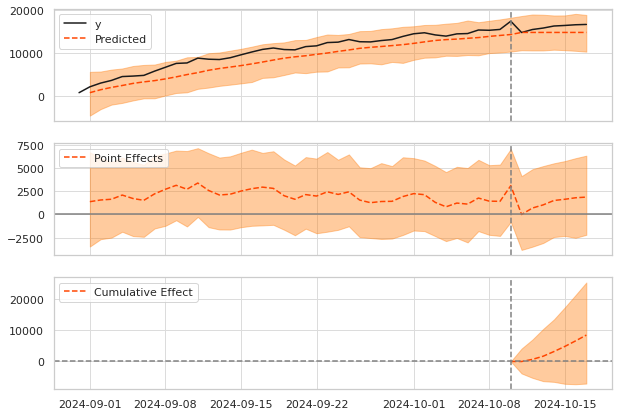

In [18]:
impact_dau.plot()

In [19]:
print(impact_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         14851.55 (1107.35) 103960.83 (7751.45)
95% CI                    [12717.11, 17057.84][89019.77, 119404.91]

Absolute effect (s.d.)    1201.17 (1107.35)  8408.17 (7751.45)
95% CI                    [-1005.13, 3335.6] [-7035.91, 23349.23]

Relative effect (s.d.)    8.09% (7.46%)      8.09% (7.46%)
95% CI                    [-6.77%, 22.46%]   [-6.77%, 22.46%]

Posterior tail-area probability p: 0.16
Posterior prob. of a causal effect: 83.72%

For more details run the command: print(impact.summary('report'))


In [20]:
print(impact_dau.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16052.71. In the absence of an
intervention, we would have expected an average response of 14851.55.
The 95% interval of this counterfactual prediction is [12717.11, 17057.84].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1201.17 with a 95% interval of
[-1005.13, 3335.6]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 112369.0.
Had the intervention not taken place, we would have expected
a sum of 103960.83. The 95% interval of this prediction is [89019.77, 119404.91].


The above results are given in terms of absolute numbers. In relative
terms, the response vari

**Вывод:** Положительные эффект DAU не является статистически значимым. DAU значимо не изменилось. Средняя величина абсолютного эффекта - примерно 934.

### 2. CTR

Отберем данные, необходимых для дальшейшей работы. Сохраним результат в датафрейм df_ctr.

In [21]:
q = """
SELECT time::date as date, 
       sum(action = 'like')/sum(action = 'view') as ctr
FROM simulator_20241020.feed_actions
GROUP BY date
"""
df_ctr = ph.read_clickhouse(q, connection=connection)
df_ctr = df_ctr.set_index('date')

Посмотрим на первые пять строк датафрейма df_ctr.

In [22]:
df_ctr.head()

,ctr
date,
2024-08-31,0.205182
2024-09-01,0.204174
2024-09-02,0.198605
2024-09-03,0.200007
2024-09-04,0.197783


Посмотрим глазами на метрику.

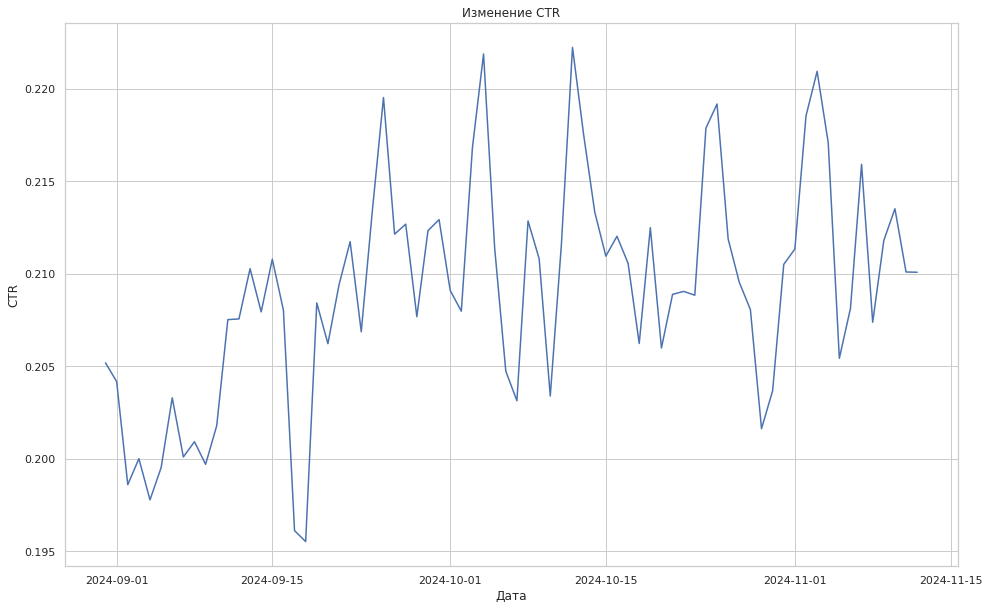

In [23]:
sns.lineplot(x='date', y='ctr', data=df_ctr)
plt.title('Изменение CTR')
plt.xlabel('Дата')
plt.ylabel('CTR');

Установим диапазоны дат для пре- и пост- периодов.

In [24]:
pre_period = [pd.Timestamp('2024-08-31'), pd.Timestamp('2024-10-10')]
post_period = [pd.Timestamp('2024-10-11'), pd.Timestamp('2024-10-17')]

Создадим модель CausalImpact для анализа CTR.

In [25]:
impact_ctr = CausalImpact(data=df_ctr[['ctr']], pre_period=pre_period, post_period=post_period)

2024-11-11 22:38:02.870190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:02.889906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:03.345926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:

Рисуем результат.

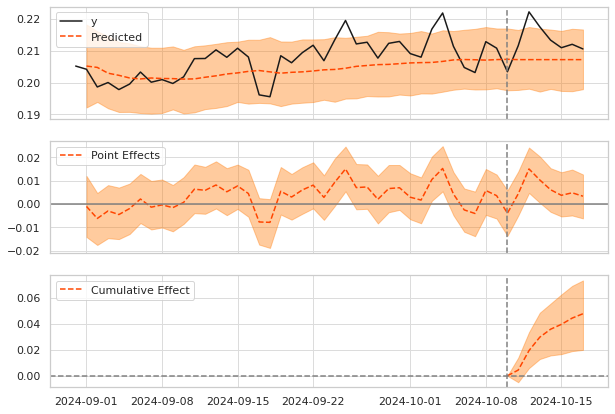

In [26]:
impact_ctr.plot()

In [27]:
print(impact_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.01)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.02, 0.07]

Relative effect (s.d.)    3.29% (0.96%)      3.29% (0.96%)
95% CI                    [1.34%, 5.12%]     [1.34%, 5.12%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [28]:
print(impact_ctr.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.21. By contrast, in the absence of an
intervention, we would have expected an average response of 0.21.
The 95% interval of this counterfactual prediction is [0.2, 0.21].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.01 with a 95% interval of
[0.0, 0.01]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1.5.
By contrast, had the intervention not taken place, we would have expected
a sum of 1.45. The 95% interval of this prediction is [1.42, 1.48].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre

**Вывод:** Положительные эффект CTR является статистически значимым. CTR значимо, но незначительно вырос. Средняя величина абсолютного эффекта - примерно 0.01.

### 3. Число просмотров

Отберем данные, необходимых для дальшейшей работы. Сохраним результат в датафрейм df_views.

In [29]:
q = """
SELECT time::date as date, 
       SUM(action = 'view') as views
FROM simulator_20241020.feed_actions
GROUP BY date
"""
df_views = ph.read_clickhouse(q, connection=connection)
df_views = df_views.set_index('date')

Посмотрим на первые пять строк датафрейма df_views.

In [30]:
df_views.head()

,views
date,
2024-08-31,7603
2024-09-01,62770
2024-09-02,105526
2024-09-03,118996
2024-09-04,174454


Посмотрим глазами на метрику.

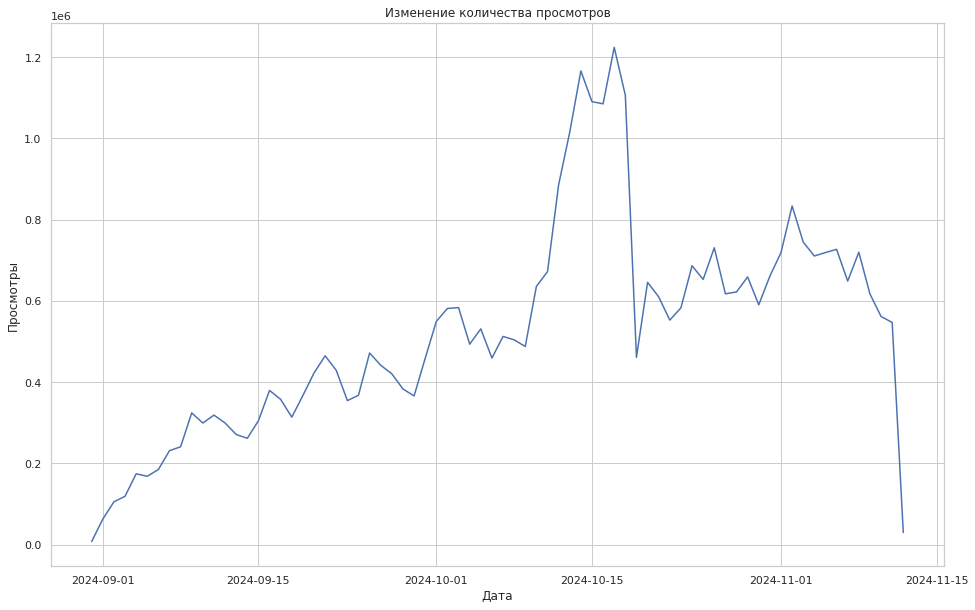

In [31]:
sns.lineplot(x='date', y='views', data=df_views)
plt.title('Изменение количества просмотров')
plt.xlabel('Дата')
plt.ylabel('Просмотры');

Установим диапазоны дат для пре- и пост- периодов.

In [32]:
pre_period = [pd.Timestamp('2024-08-31'), pd.Timestamp('2024-10-10')]
post_period = [pd.Timestamp('2024-10-11'), pd.Timestamp('2024-10-17')]

Создадим модель CausalImpact для анализа числа просмотров.

In [33]:
impact_views = CausalImpact(data=df_views[['views']], pre_period=pre_period, post_period=post_period)

2024-11-11 22:38:18.395465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:18.415400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:18.885199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:

2024-11-11 22:38:30.270074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-11-11 22:38:30.342377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

Рисуем результат.

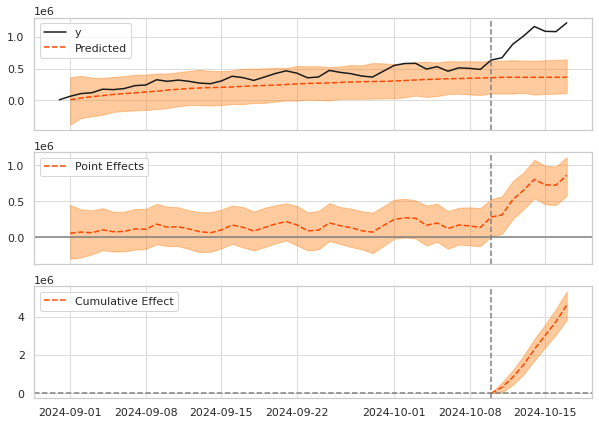

In [34]:
impact_views.plot()

In [35]:
print(impact_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         363178.75 (53917.04)2542251.25 (377419.28)
95% CI                    [258152.95, 469503.93][1807070.73, 3286527.42]

Absolute effect (s.d.)    656768.56 (53917.04)4597380.0 (377419.28)
95% CI                    [550443.39, 761794.36][3853103.58, 5332560.27]

Relative effect (s.d.)    180.84% (14.85%)   180.84% (14.85%)
95% CI                    [151.56%, 209.76%] [151.56%, 209.76%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [36]:
print(impact_views.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1019947.31. By contrast, in the absence of an
intervention, we would have expected an average response of 363178.75.
The 95% interval of this counterfactual prediction is [258152.95, 469503.93].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 656768.56 with a 95% interval of
[550443.39, 761794.36]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 7139631.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2542251.25. The 95% interval of this prediction is [1807070.73, 3286527.42].


The above results are given in terms of absolute num

**Вывод:** Положительные эффект количества просмотров является статистически значимым. Число просмотров значимо выросло. Средняя величина абсолютного эффекта - примерно 656781.

### 4. Уникальные просматриваемые посты

Отберем данные, необходимых для дальшейшей работы. Сохраним результат в датафрейм df_posts.

In [37]:
q = """
SELECT time::date as date, 
       COUNT(DISTINCT post_id) as posts
FROM simulator_20241020.feed_actions
GROUP BY date
"""
df_posts = ph.read_clickhouse(q, connection=connection)
df_posts = df_posts.set_index('date')

Посмотрим на первые пять строк датафрейма df_posts.

In [38]:
df_posts.head()

,posts
date,
2024-08-31,89
2024-09-01,178
2024-09-02,191
2024-09-03,211
2024-09-04,214


Посмотрим глазами на метрику.

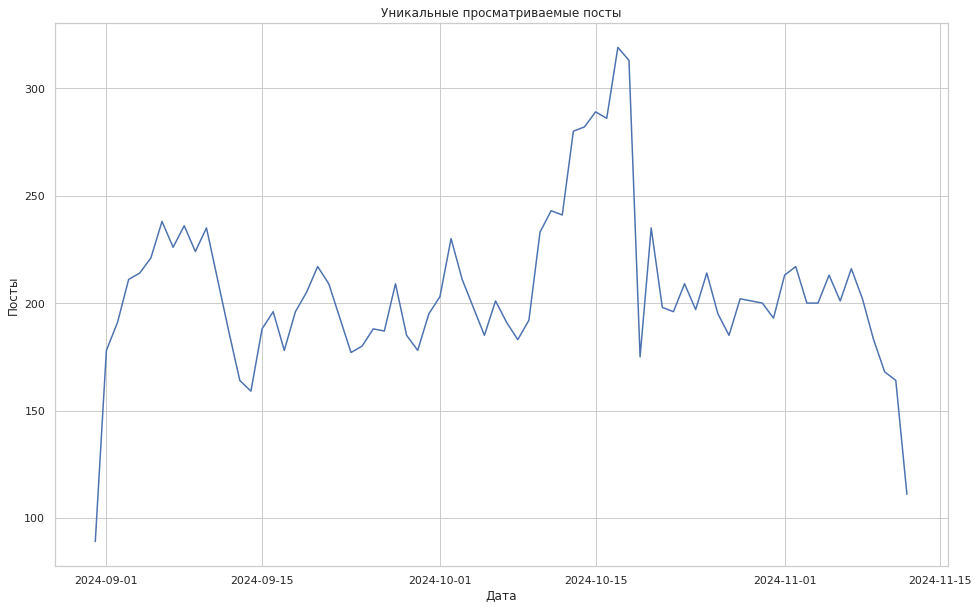

In [39]:
sns.lineplot(x='date', y='posts', data=df_posts)
plt.title('Уникальные просматриваемые посты')
plt.xlabel('Дата')
plt.ylabel('Посты');

Установим диапазоны дат для пре- и пост- периодов.

In [40]:
pre_period = [pd.Timestamp('2024-08-31'), pd.Timestamp('2024-10-10')]
post_period = [pd.Timestamp('2024-10-11'), pd.Timestamp('2024-10-17')]

Создадим модель CausalImpact для анализа уникальных просматриваемых постов.

In [41]:
impact_posts = CausalImpact(data=df_posts[['posts']], pre_period=pre_period, post_period=post_period)

2024-11-11 22:38:33.447318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:33.466577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:33.928362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:

Рисуем результат.

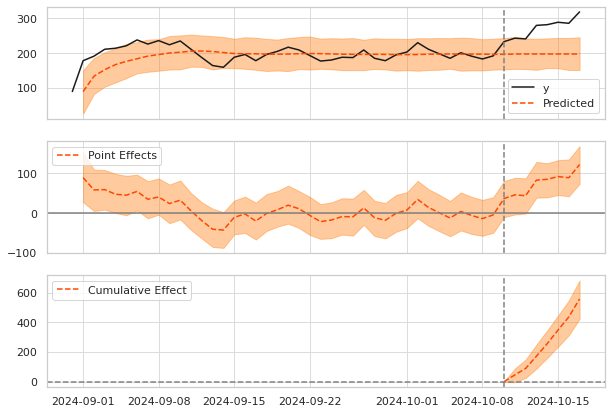

In [42]:
impact_posts.plot()

In [43]:
print(impact_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.32 (9.84)      1381.26 (68.85)
95% CI                    [177.53, 216.09]   [1242.74, 1512.62]

Absolute effect (s.d.)    79.82 (9.84)       558.74 (68.85)
95% CI                    [61.05, 99.61]     [427.38, 697.26]

Relative effect (s.d.)    40.45% (4.98%)     40.45% (4.98%)
95% CI                    [30.94%, 50.48%]   [30.94%, 50.48%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [44]:
print(impact_posts.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 277.14. By contrast, in the absence of an
intervention, we would have expected an average response of 197.32.
The 95% interval of this counterfactual prediction is [177.53, 216.09].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 79.82 with a 95% interval of
[61.05, 99.61]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1940.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 1381.26. The 95% interval of this prediction is [1242.74, 1512.62].


The above results are given in terms of absolute numbers. In relative
terms, the response

**Вывод:** Положительные эффект уникальных просматриваемых постов является статистически значимым. Число уникальных просматриваемых постов значимо выросло. Средняя величина абсолютного эффекта - примерно 80.

### 5. Новые посты 

Отберем данные, необходимых для дальшейшей работы. Сохраним результат в датафрейм df_new_posts.

In [45]:
b = """
SELECT start_date,  
       count(DISTINCT post_id) as new_post_id
FROM
    (SELECT post_id,
            MIN(time::date) as start_date
    FROM simulator_20241020.feed_actions
    GROUP BY  post_id 
    ORDER BY start_date) t1
GROUP BY start_date
"""
df_new_posts = ph.read_clickhouse(b, connection=connection)
df_new_posts = df_new_posts.set_index('start_date')

Посмотрим на первые пять строк датафрейма df_new_posts.

In [46]:
df_new_posts.head()

,new_post_id
start_date,
2024-08-31,89
2024-09-01,97
2024-09-02,61
2024-09-03,87
2024-09-04,70


Посмотрим глазами на метрику.

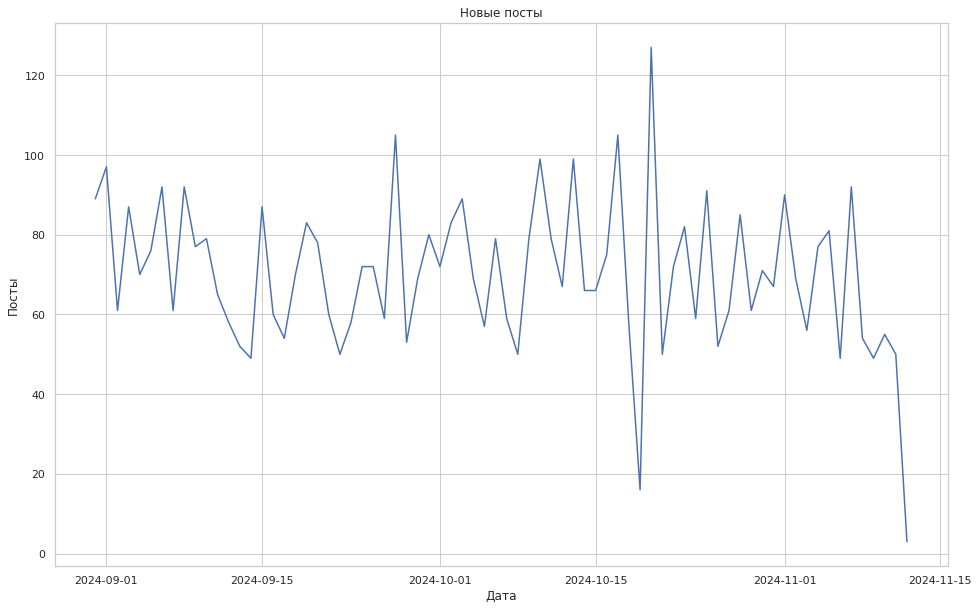

In [47]:
sns.lineplot(x='start_date', y='new_post_id', data=df_new_posts)
plt.title('Новые посты')
plt.xlabel('Дата')
plt.ylabel('Посты');

Установим диапазоны дат для пре- и пост- периодов.

In [48]:
pre_period = [pd.Timestamp('2024-08-31'), pd.Timestamp('2024-10-10')]
post_period = [pd.Timestamp('2024-10-11'), pd.Timestamp('2024-10-17')]

Создадим модель CausalImpact для анализа новых постов.

In [49]:
impact_new_posts = CausalImpact(data=df_new_posts[['new_post_id']], pre_period=pre_period, post_period=post_period)

2024-11-11 22:38:48.973670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:48.993383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:38:49.444409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-11-11 22:

2024-11-11 22:39:00.519968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1' with dtype int32 and shape [2]
	 [[{{node AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/while/strided_slice/AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/concat_1}}]]
2024-11-11 22:39:00.586197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'AdditiveStateSpaceModel/sample/AdditiveStateSpaceModel/sample_n_joint/scan/whil

Рисуем результат.

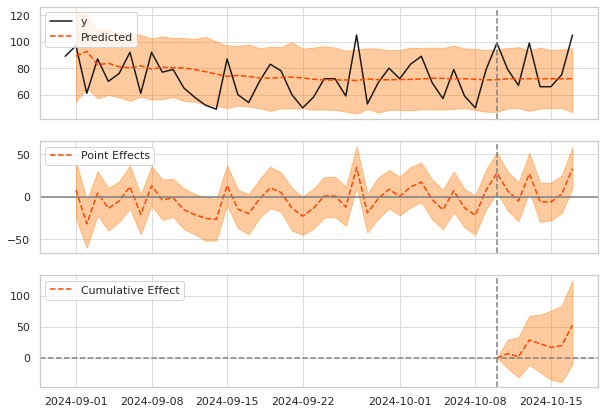

In [50]:
impact_new_posts.plot()

In [51]:
print(impact_new_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    79.57              557.0
Prediction (s.d.)         72.02 (4.69)       504.15 (32.84)
95% CI                    [63.3, 81.69]      [443.11, 571.84]

Absolute effect (s.d.)    7.55 (4.69)        52.85 (32.84)
95% CI                    [-2.12, 16.27]     [-14.84, 113.89]

Relative effect (s.d.)    10.48% (6.51%)     10.48% (6.51%)
95% CI                    [-2.94%, 22.59%]   [-2.94%, 22.59%]

Posterior tail-area probability p: 0.07
Posterior prob. of a causal effect: 92.91%

For more details run the command: print(impact.summary('report'))


In [52]:
print(impact_new_posts.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 79.57. In the absence of an
intervention, we would have expected an average response of 72.02.
The 95% interval of this counterfactual prediction is [63.3, 81.69].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 7.55 with a 95% interval of
[-2.12, 16.27]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 557.0.
Had the intervention not taken place, we would have expected
a sum of 504.15. The 95% interval of this prediction is [443.11, 571.84].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +10.

**Вывод:** Положительные эффект новых постов не является статистически значимым. Число новых постов значимо не изменилось. Средняя величина абсолютного эффекта - примерно 8.

## Выводы

Флешмоб увеличил количество просмотров, уникальных просматриваемых постов и ctr. Однако после окончания флешмоба метрики вернулись на уровень до флешмоба. Эффект от события был временный.

## Задание 2

## Описание

Чем активнее пользователи – тем выше нагрузка на сервера. И в последнее время всё чаще приходят жалобы, что приложение подвисает. Задача – спрогнозировать, как изменится активность пользователей в течение ближайшего месяца. 

1. Выбрать основную метрику, которую планируем прогнозировать. Обосновать, почему именно она. Какое временное разрешение необходимо взять? Будут ли какие-то дополнительные регрессоры, которые вы включите в модель?

2. Построить модель и провалидировать её. Хватает ли данных для бэктестинга с текущей задачей? Если нет, то определить, для какого горизонта прогнозирования хватает данных.

3. Выбрать ту модель, которая кажется наиболее удачной. Проинтерпретировать её результаты. Если есть какие-то важные ограничения по выводу – необходимо указать.




Все необходимые библиотеки уже импортированы в первом задании.

Для прогнозирования будем использовать действия пользователей, а именно просмотры и лайки. Так как чем больше пользователь просматривает посты и лайкает их, тем больше идет нагрузка на сервера. Так как нам надо ответить на вопрос, как изменится активность пользователей в течение ближайшего месяца, возьмем все имеющиеся данные (в целом у нас их не так много).
В качестве регрессора будем использовать проведение флэшмоба, так как в эти дни наблюдался скачок в действиях пользователей. 

Отберем данные, необходимых для дальшейшей работы. 

In [53]:
q = """
SELECT toStartOfHour(time) AS hour_time,
       COUNT(action) AS actions,
       COUNT(DISTINCT user_id) AS dau
FROM {db}.feed_actions  
GROUP BY hour_time  
ORDER BY hour_time
"""

Сохраним результат в датафрейм df.

In [54]:
df = ph.read_clickhouse(q, connection=connection)

Посмотрим на наши данные.

In [55]:
df.head()

,hour_time,actions,dau
0,2024-08-31 00:00:00,22,14
1,2024-08-31 01:00:00,32,26
2,2024-08-31 02:00:00,24,16
3,2024-08-31 03:00:00,11,11
4,2024-08-31 04:00:00,18,14


Визуализируем изменения действий пользователей в разрезе времени.

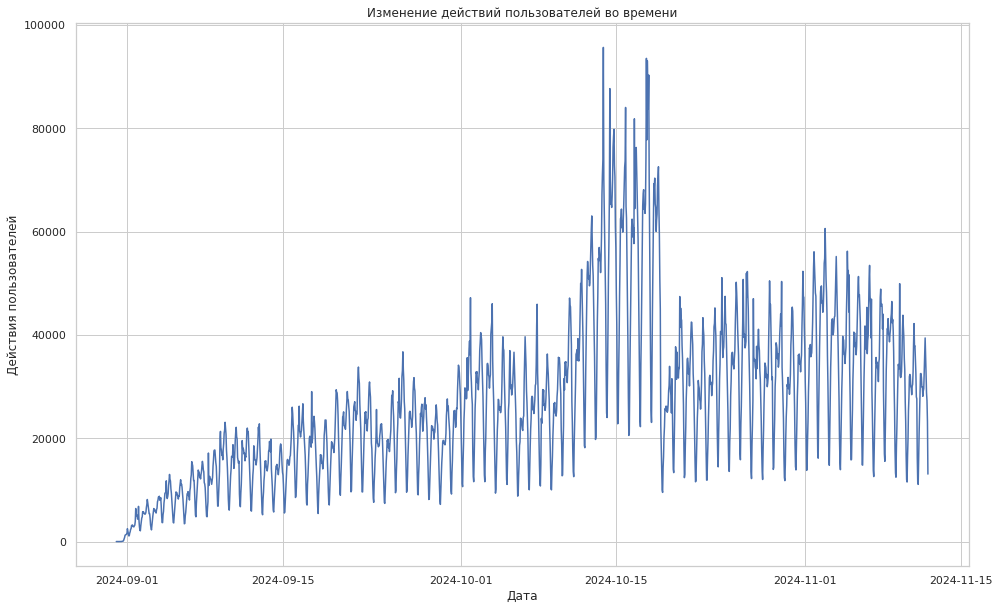

In [56]:
sns.lineplot(data=df, x='hour_time', y='actions')
plt.title('Изменение действий пользователей во времени')
plt.xlabel('Дата')
plt.ylabel('Действия пользователей');

Наблюдаем резкий скачок действий пользователей в период проведения флэшмоба. 

Визуализируем изменения количества пользователей в разрезе времени.

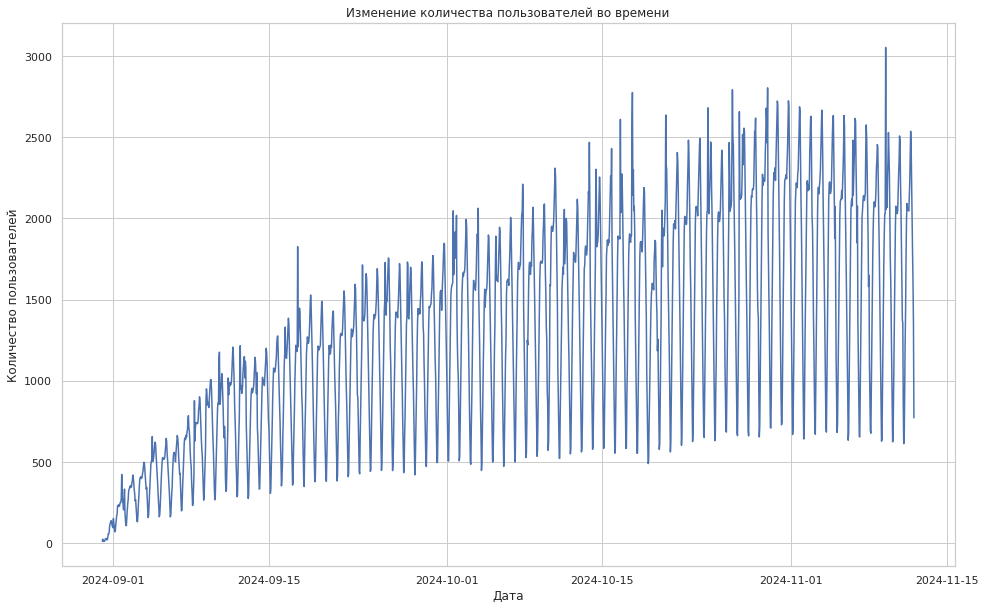

In [57]:
sns.lineplot(data=df, x='hour_time', y='dau')
plt.title('Изменение количества пользователей во времени')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей');

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

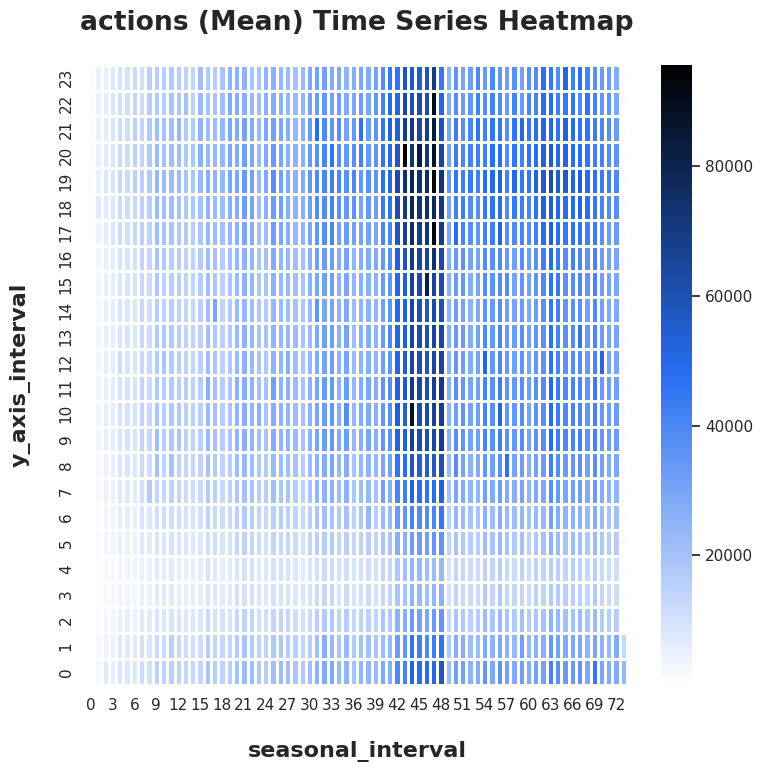

In [58]:
#тепловая карта
_ = eda_plot.ts_heatmap(df=df, date_col="hour_time", value_col="actions", seasonal_interval=24, normalization=False)

Видим явный рост действий пользователей, который приходится на флэшмоб.

### Построение моделей без регрессоров

### MAP

In [59]:
dlt = DLT(response_col="actions", #название колонки с метрикой
                date_col="hour_time", #название колонки с датами-временем
                seasonality=24, #длина периода сезонности
                estimator="stan-map", #алгоритм оценки
                n_bootstrap_draws=1000) #количество сэмплов бутстрапа для доверительного интервала

2024-11-11 22:39:05 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


Обучаем модель на данных.

In [60]:
dlt.fit(df)

Создим датафрейм с горизонтом прогнозирования - то есть теми датами, которые мы хотим предсказать! Для этого есть вспомогательный метод .make_future_df(). Возьмем горизонт 30 дней,  то есть 30 раз по 24 часа.

In [61]:
future_df = dlt.make_future_df(periods=24*30)
future_df.head()

,hour_time
0,2024-11-12 02:00:00
1,2024-11-12 03:00:00
2,2024-11-12 04:00:00
3,2024-11-12 05:00:00
4,2024-11-12 06:00:00


Делаем прогноз.

In [62]:
predicted_df = dlt.predict(df=future_df)
predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95
0,2024-11-12 02:00:00,312.031609,3719.403443,7497.291585
1,2024-11-12 03:00:00,-6328.350202,-1424.728693,3264.903640
2,2024-11-12 04:00:00,-7581.213690,-2594.360828,2704.015408
3,2024-11-12 05:00:00,-3402.788676,2463.207036,8788.014537
4,2024-11-12 06:00:00,41.600849,6369.874901,12927.643435


Визуализируем прогноз.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

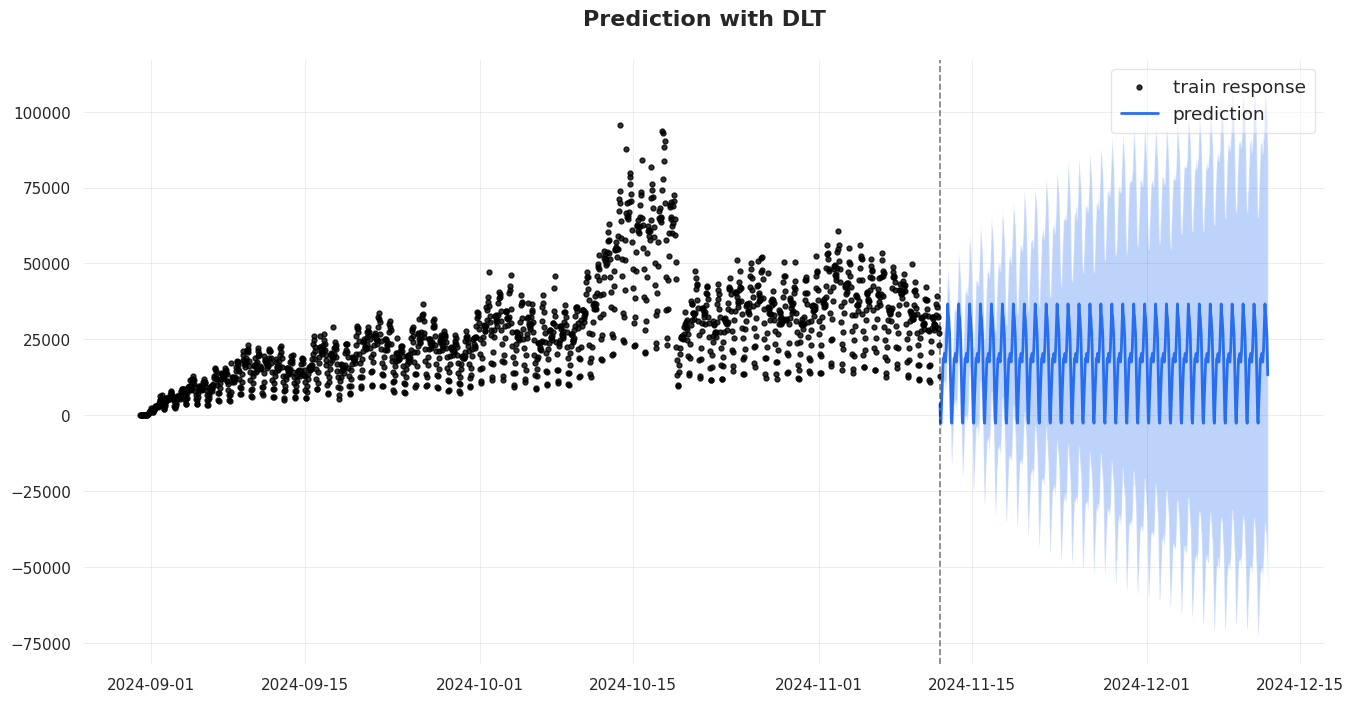

In [63]:
_ = plot_predicted_data(df, predicted_df, "hour_time", 'actions', title='Prediction with DLT')

Судя по графику, основное предсказание - изменения в количестве действий пользователей будут немного изменяться в меньшую сторону, но будут стабильны. А предсказательный интервал со временем увеличивается как в меньшую, так и в большую сторону.

In [64]:
predicted_df = dlt.predict(df=future_df, 
                           decompose=True) #говорит, что нам нужна декомпозиция предсказания
predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2024-11-12 02:00:00,-128.449987,3719.403443,7515.712764,14269.750013,18117.603443,21913.912764,-14398.2,-14398.2,-14398.2,0.0,0.0,0.0
1,2024-11-12 03:00:00,-6075.664259,-1424.728693,3521.962780,13466.635741,18117.571307,23064.262780,-19542.3,-19542.3,-19542.3,0.0,0.0,0.0
2,2024-11-12 04:00:00,-8148.639839,-2594.360828,3198.211185,12563.260161,18117.539172,23910.111185,-20711.9,-20711.9,-20711.9,0.0,0.0,0.0
3,2024-11-12 05:00:00,-3447.841041,2463.207036,8706.905865,12206.458959,18117.507036,24361.205865,-15654.3,-15654.3,-15654.3,0.0,0.0,0.0
4,2024-11-12 06:00:00,246.138789,6369.874901,13157.410020,11993.738789,18117.474901,24905.010020,-11747.6,-11747.6,-11747.6,0.0,0.0,0.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

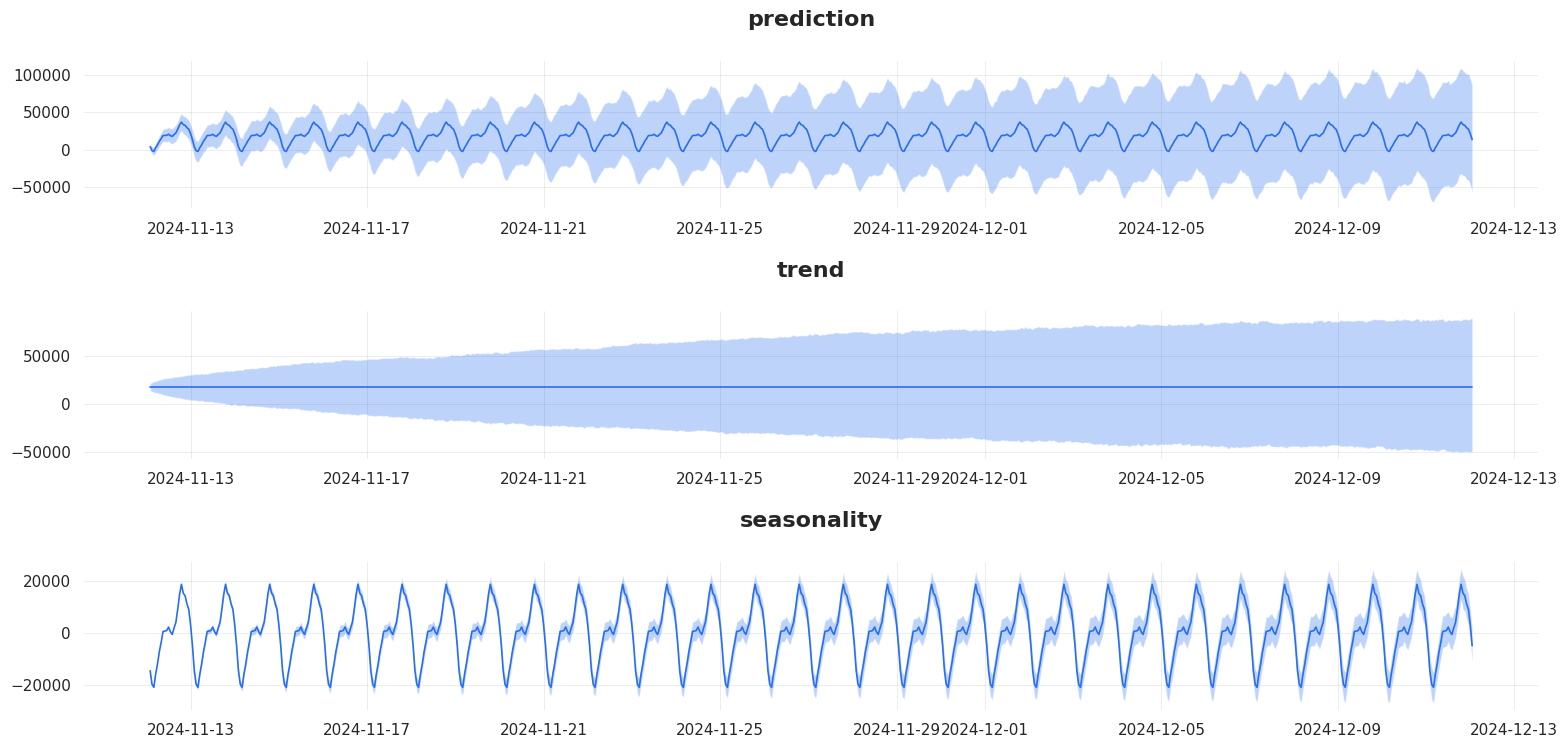

In [65]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality'])

#### MCMC

Метод Markov Chain Monte Carlo (MCMC) оценивает доверительные интервалы для всего, и имеет гораздо больше теоретических гарантий точности - но при этом не самый шустрый. Попробуем оценить модель с помощью него:

In [66]:
dlt_mcmc = DLT(seasonality=24,response_col="actions", date_col="hour_time", 
               estimator='stan-mcmc', #новый алгоритм оценки
               num_warmup=2000, #время "разогрева"
               num_sample=1000) #время сэмплирования

Запускаем:

In [67]:
dlt_mcmc.fit(df)

2024-11-11 22:39:11 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 250.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

Повторяем шаги из предыдущего пункта.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

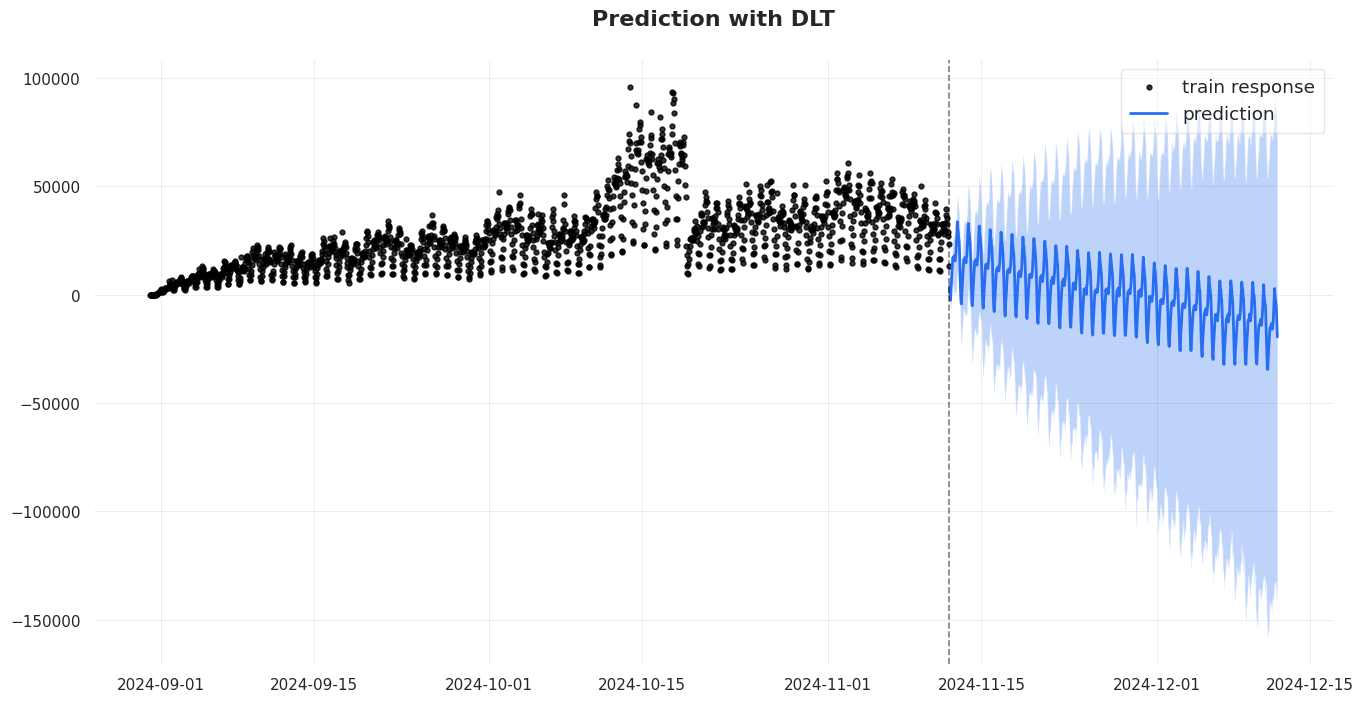

In [68]:
future_df = dlt_mcmc.make_future_df(periods=24*30)

predicted_df = dlt_mcmc.predict(df=future_df)

_ = plot_predicted_data(df, predicted_df, "hour_time", 'actions', title='Prediction with DLT')

Модель прогнозирует, что наша метрика за месяц будет падать.

Декомпозируем:

In [69]:
predicted_df = dlt_mcmc.predict(df=future_df, decompose=True) 

print(predicted_df.head())

            hour_time  prediction_5   prediction  prediction_95      trend_5  \
0 2024-11-12 02:00:00    105.241908  4055.207329   10200.359156  1452.128197   
1 2024-11-12 03:00:00  -6466.040849 -1228.765195    4449.178586  -509.972651   
2 2024-11-12 04:00:00  -8166.057836 -2552.105973    3349.110872 -2164.699652   
3 2024-11-12 05:00:00  -4329.982584  2328.952879    8630.786198 -2671.630882   
4 2024-11-12 06:00:00  -1656.243266  5650.437905   12506.121482 -3653.092578   

          trend      trend_95  seasonality_5  seasonality  seasonality_95  \
0  16267.835516  20838.428728     -14973.470    -13088.30      4678.60750   
1  16155.517547  21591.859142     -20107.140    -18225.80       -38.22711   
2  15834.688444  21968.179184     -21298.650    -19385.35      -829.99090   
3  15554.729313  22304.923847     -16257.105    -14335.25      3593.53000   
4  15340.312638  23091.392628     -12358.385    -10431.80      6462.46150   

   regression_5  regression  regression_95  
0          

Нарисуем:

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

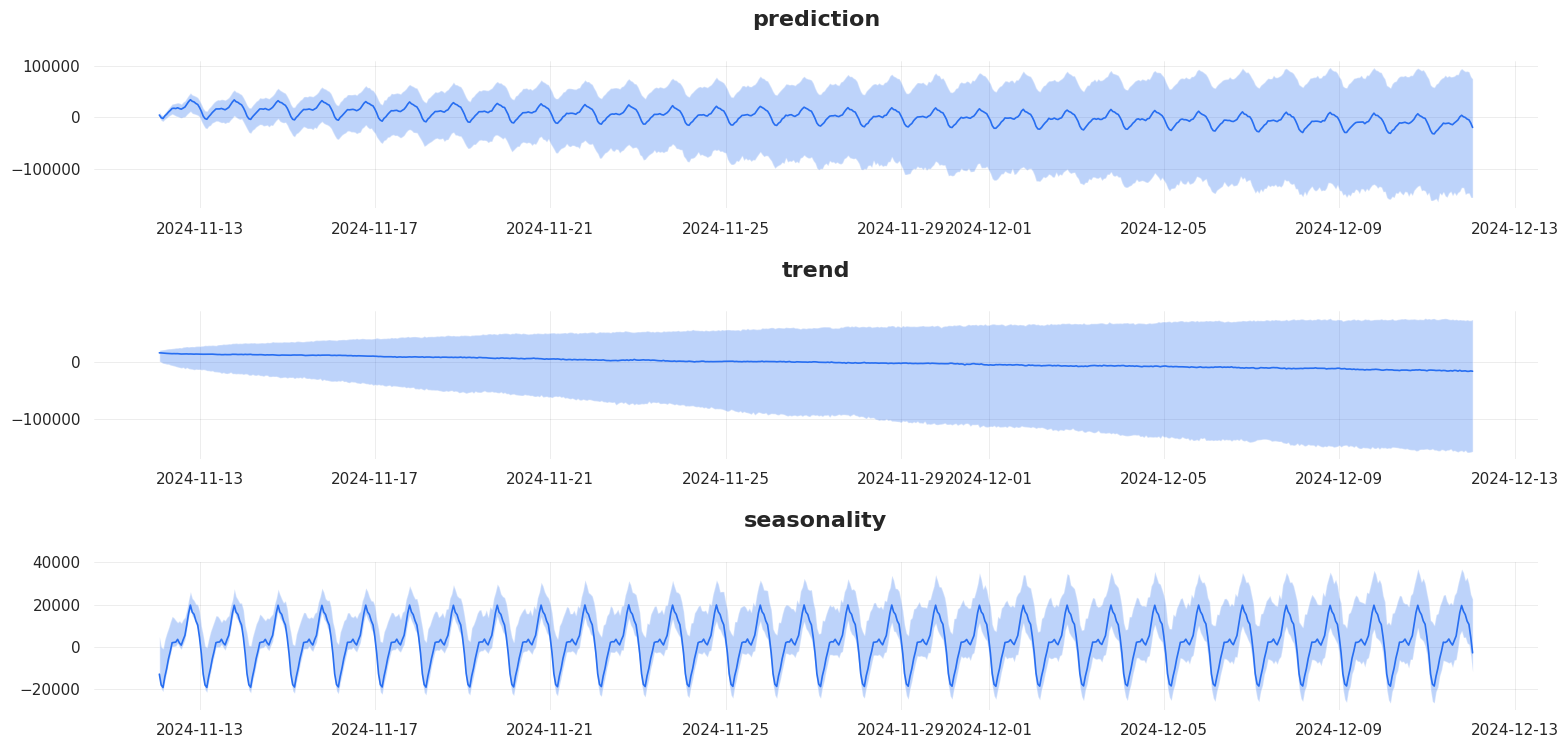

In [70]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality'])

### Проверка качества моделей

Первая модель построена! Однако есть вопрос: а насколько эта модель хороша? Насколько сильные ошибки стоит для неё ожидать?
Так как наблюдения у нас не независимые, а связанные между собой временем, то необходимо использовать концепцию бэктестинга. 

In [71]:
bt_exp = BackTester(
    model=dlt, #наша моделька
    df=df, #датафрейм для обучения
    min_train_len=24*7, #самый маленький кусочек данных, с которого начинается обучение
    incremental_len=24, #на сколько происходит прирост тренировочных данных
    forecast_len=24*30, #горизонт пронозирования
    window_type="expanding" #тип окошка
)

Расширяющееся окно начинает с небольшого размера тренировочных данных и постепенно его увеличивает, пока не кончатся данные. Так можно оценить, как меняется точность предсказания с наращиванием количества информации. Такой вариант окна лучше всего подходит, если данные не слишком волатильны и в далеком прошлом есть важная информация, полезная для предсказания в будущем:

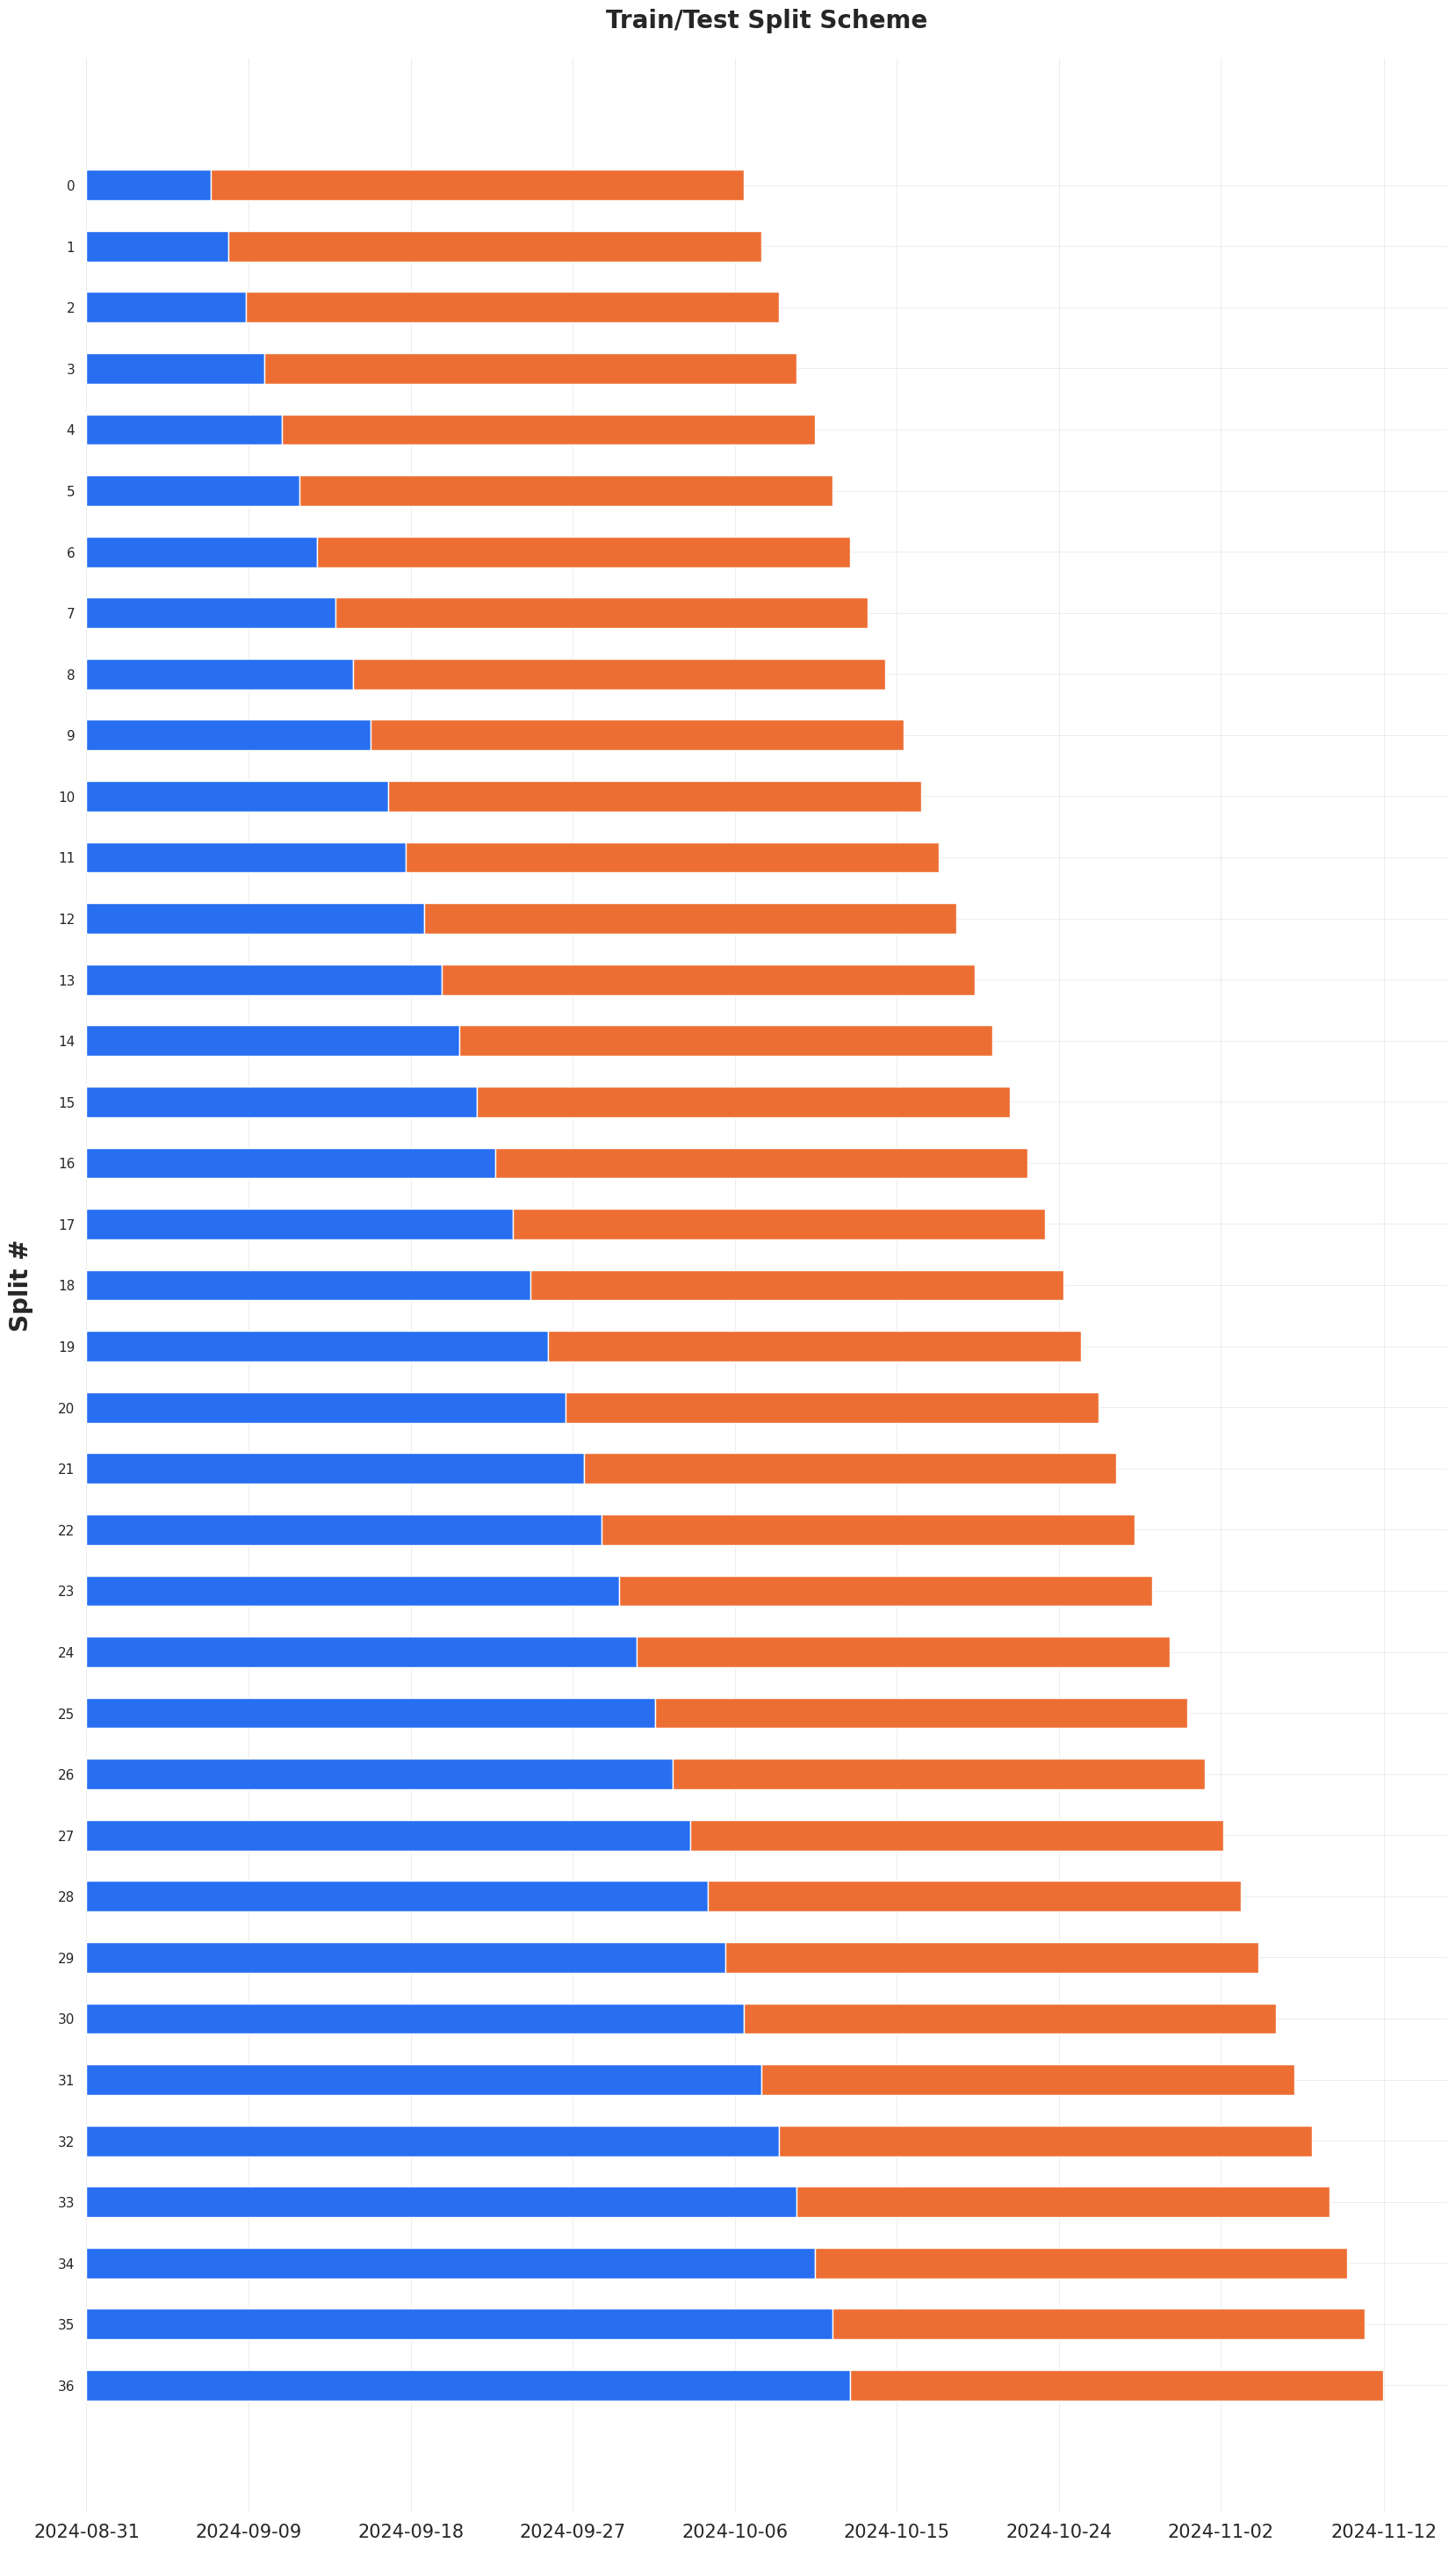

In [72]:
bt_exp.plot_scheme()

In [73]:
bt_exp.fit_predict() #обучаем
bt_exp.score() #выводим метрики

,metric_name,metric_values,is_training_metric
0,smape,3.079868e-01,False
1,wmape,3.064131e-01,False
2,mape,3.047300e-01,False
3,mse,1.996329e+08,False
4,mae,9.612302e+03,False
5,rmsse,2.947081e+00,False


In [74]:
#rolling

bt_roll = BackTester(
    model=dlt,
    df=df,
    min_train_len=24*7,
    incremental_len=24,
    forecast_len=24*30,
    window_type="rolling",
)

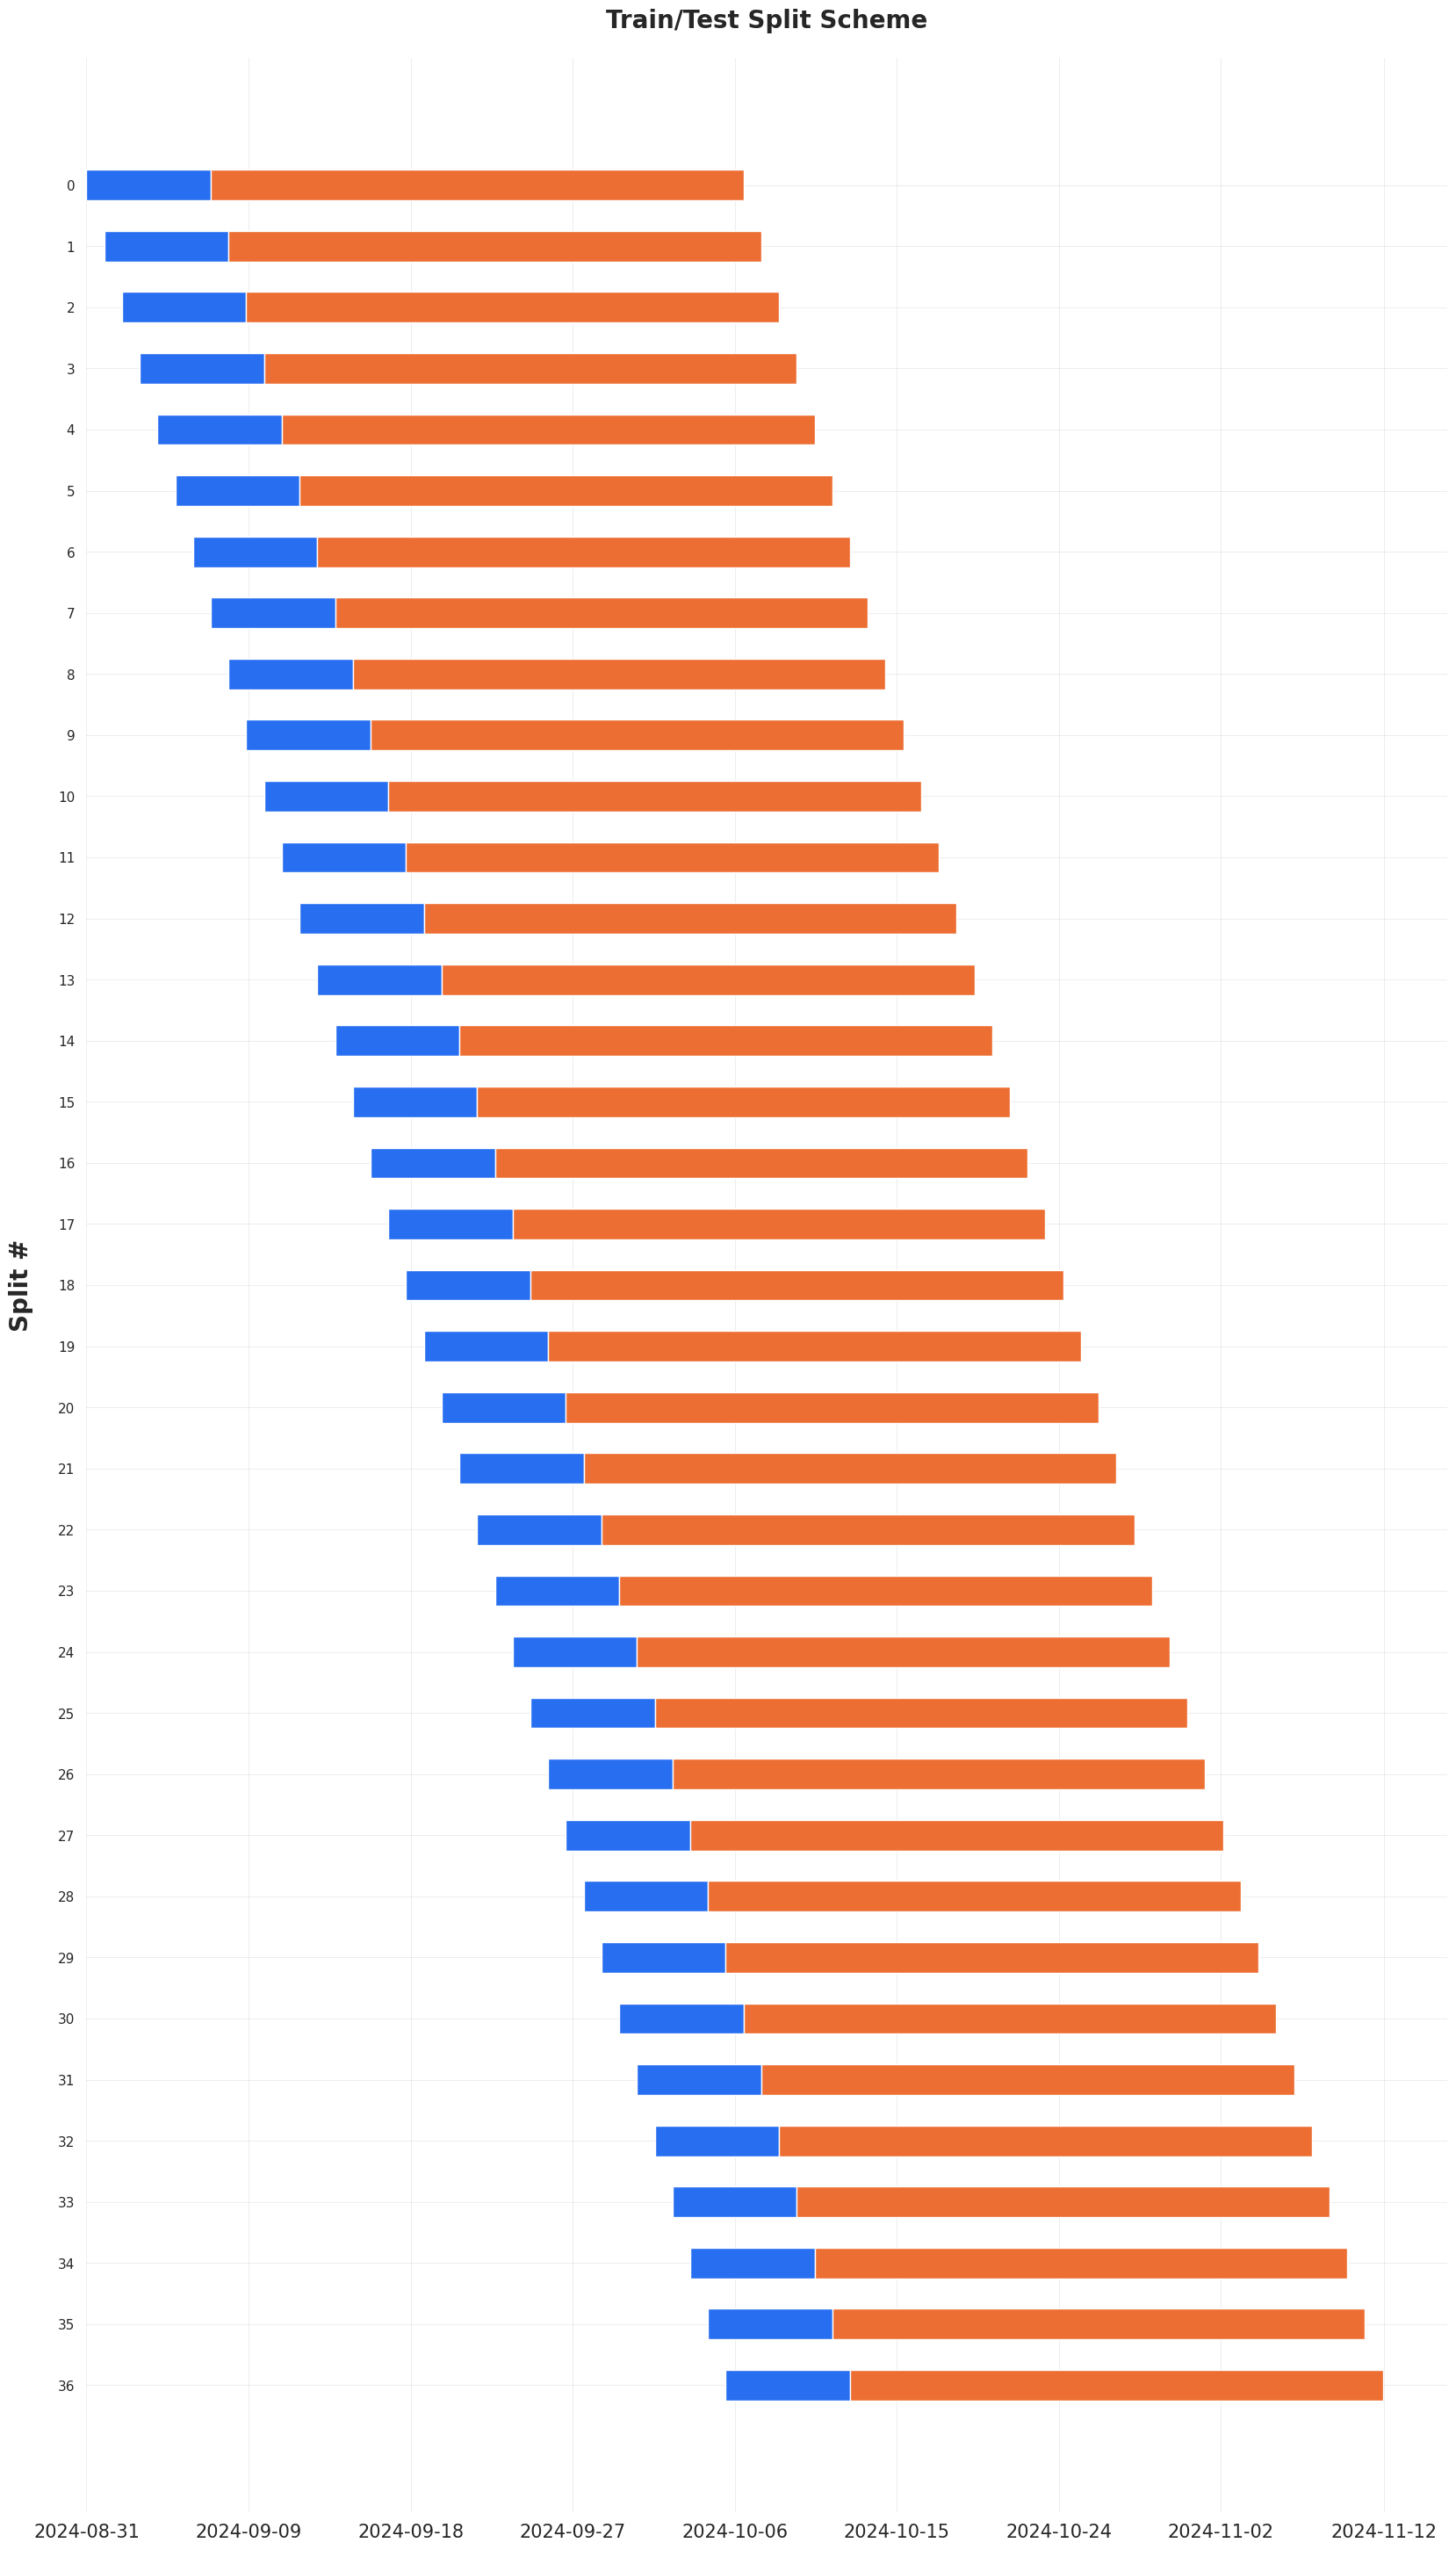

In [75]:
bt_roll.plot_scheme()

In [76]:
bt_roll.fit_predict() #обучаем
bt_roll.score() #выводим метрики

,metric_name,metric_values,is_training_metric
0,smape,4.207816e-01,False
1,wmape,4.539167e-01,False
2,mape,5.107319e-01,False
3,mse,3.798838e+08,False
4,mae,1.423955e+04,False
5,rmsse,4.065383e+00,False


#### Проверка MCMC

Хотя MCMC и является более точным методам, он также более требователен к настройке параметров и соблюдению допущений. Им можно проверять графически для разных параметров - главное смотреть на глобальные показатели!

In [77]:
params = dlt_mcmc.get_posterior_samples(permute=False) #достаём информацию о параметрах

params.keys() #их названия - можно залезть в оригинальный код на Stan, чтобы вычислить их значение

dict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'gt_sum', 'gb', 'gl', 'loglk'])

In [78]:
params["obs_sigma"].shape

(4, 250)

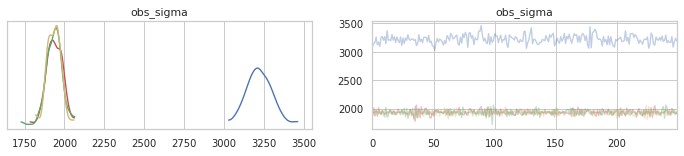

In [79]:
az.plot_trace(params, chain_prop={"color": ['r', 'b', 'g', 'y']}, var_names = "obs_sigma");

Судя по графикам, у нас получилось совсем не то, что нужно.

### Модель с регрессором

В качестве регрессора будем использовать флэшмоб. Поэтому при написании запроса, создадим колонку, где отметим, попадает ли данная дата в даты проведения флэшмоба.

In [80]:
q = """
SELECT toStartOfHour(time) AS hour_time,
       COUNT(action) AS actions,
       COUNT(DISTINCT user_id) AS dau,
       (CASE 
       WHEN toDate(time) BETWEEN '2024-10-11' AND '2024-10-17' THEN 1
       ELSE 0 
       END) AS flashmob
FROM {db}.feed_actions
GROUP BY hour_time, flashmob  
ORDER BY hour_time
"""

In [81]:
df_flashmob = ph.read_clickhouse(q, connection=connection)

In [82]:
df_flashmob.head()

,hour_time,actions,dau,flashmob
0,2024-08-31 00:00:00,22,14,0
1,2024-08-31 01:00:00,32,26,0
2,2024-08-31 02:00:00,24,16,0
3,2024-08-31 03:00:00,11,11,0
4,2024-08-31 04:00:00,18,14,0


Посмотрим на корреляцию:

In [83]:
df_flashmob.drop("hour_time", axis=1).corr() #по Пирсону 

,actions,dau,flashmob
actions,1.000000,0.818965,0.516863
dau,0.818965,1.000000,0.122399
flashmob,0.516863,0.122399,1.000000


In [84]:
df_flashmob.drop("hour_time", axis=1).corr(method="spearman") # Спирмен 

,actions,dau,flashmob
actions,1.000000,0.901479,0.387761
dau,0.901479,1.000000,0.127778
flashmob,0.387761,0.127778,1.000000


In [85]:
train_dat = df_flashmob.query("hour_time < '2024-10-20 00:00:00'") #возьмём часть данных для обучения
test_dat = df_flashmob.query("hour_time >= '2024-10-20 00:00:00'") #а это будем предсказывать - важно сконвертировать в инт

In [86]:
reg_model = DLT(response_col="actions",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["flashmob"] #наша колонка с регрессором! Должна быть списком
               ) 

reg_model.fit(train_dat)

2024-11-11 22:46:41 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

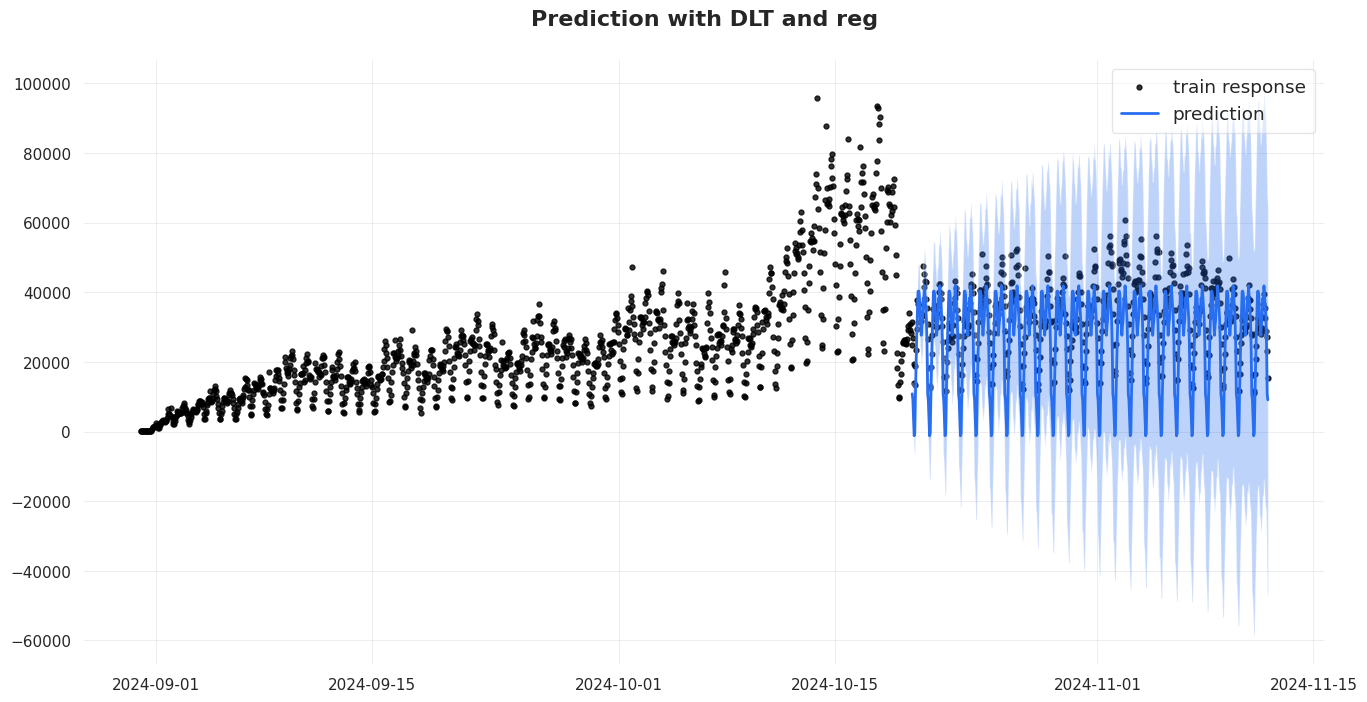

In [87]:
predicted_df_reg = reg_model.predict(df=test_dat)

_ = plot_predicted_data(df_flashmob, predicted_df_reg, "hour_time", 'actions', title='Prediction with DLT and reg') 

In [88]:
predicted_df = reg_model.predict(df=test_dat, decompose=True)

predicted_df.head()

,hour_time,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95,regression_5,regression,regression_95
0,2024-10-20 00:00:00,7187.663777,10817.222986,14161.001821,22396.263777,26025.822986,29369.601821,-15208.6,-15208.6,-15208.6,0.0,0.0,0.0
1,2024-10-20 01:00:00,5004.101419,9102.697386,12980.930186,21927.201419,26025.797386,29904.030186,-16923.1,-16923.1,-16923.1,0.0,0.0,0.0
2,2024-10-20 02:00:00,-597.246914,3774.871760,8169.231573,21653.653086,26025.771760,30420.131573,-22250.9,-22250.9,-22250.9,0.0,0.0,0.0
3,2024-10-20 03:00:00,-6310.308863,-1215.553887,4137.577770,20930.991137,26025.746113,31378.877770,-27241.3,-27241.3,-27241.3,0.0,0.0,0.0
4,2024-10-20 04:00:00,-6042.127048,-455.979550,5309.487441,20439.572952,26025.720450,31791.187441,-26481.7,-26481.7,-26481.7,0.0,0.0,0.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

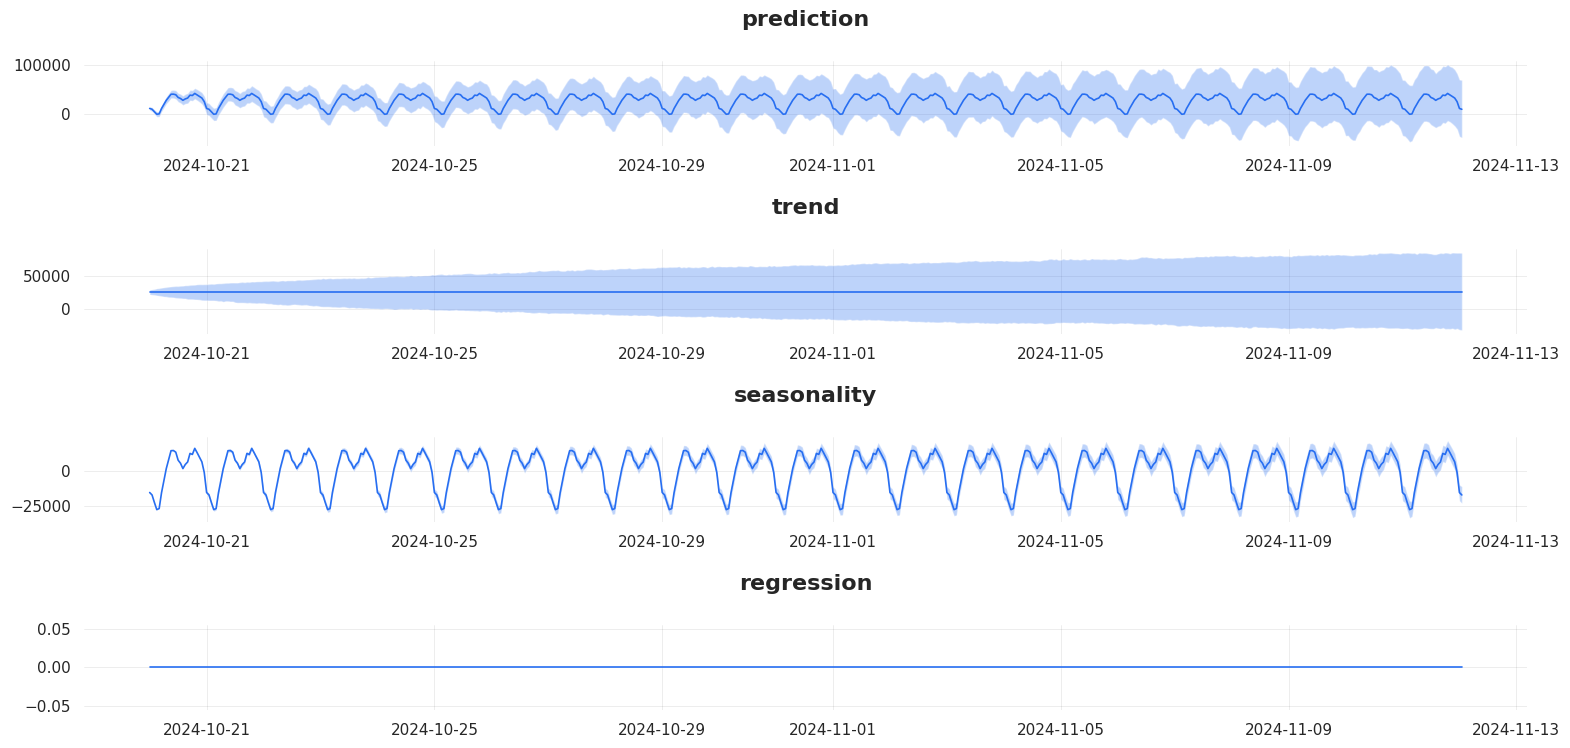

In [89]:
_ = plot_predicted_components(predicted_df, "hour_time", plot_components=['prediction', 'trend', 'seasonality', "regression"])

Взглянем на коэффициент регрессии:

In [90]:
reg_model.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,flashmob,Regular,0.011442


#### Регуляризация

Очень часто, чтобы решить проблемы с переобучением, ML-специалисты прибегают к технике регуляризации - дополнительных штрафов к коэффициентам модели, чтобы они не становились слишком большими, особенно если регрессор плохой. По умолчанию оно стоит как fixed_ridge. Зададим auto_ridge - эта опция адаптивно подбирает оптимальную степень регуляризации на основе данных.

In [91]:
reg_model_auto = DLT(response_col="actions",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["flashmob"], 
                regression_penalty="auto_ridge" #наш новый параметр
               ) 

reg_model_auto.fit(train_dat)

2024-11-11 22:46:46 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

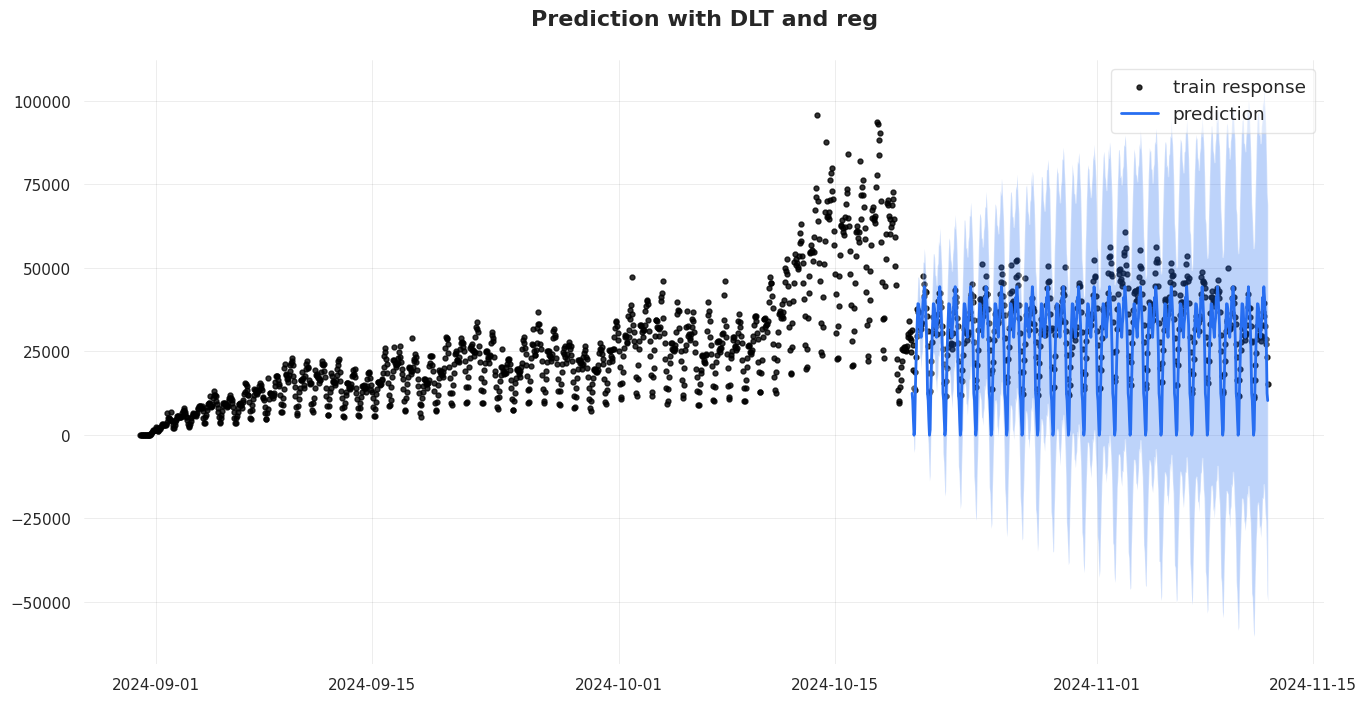

In [92]:
predicted_df_auto = reg_model_auto.predict(df=test_dat)

_ = plot_predicted_data(df_flashmob, predicted_df_auto, "hour_time", 'actions', title='Prediction with DLT and reg')

In [93]:
reg_model_auto.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,flashmob,Regular,0.0


Также сделаем lasso - оно обычно "зануляет" плохие регрессоры:

In [94]:
reg_model_lasso = DLT(response_col="actions",
                date_col="hour_time", 
                seasonality=24,
                estimator="stan-map", 
                n_bootstrap_draws=1000, 
                regressor_col=["flashmob"], 
                regression_penalty="lasso"
               ) 

reg_model_lasso.fit(train_dat)

2024-11-11 22:46:48 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

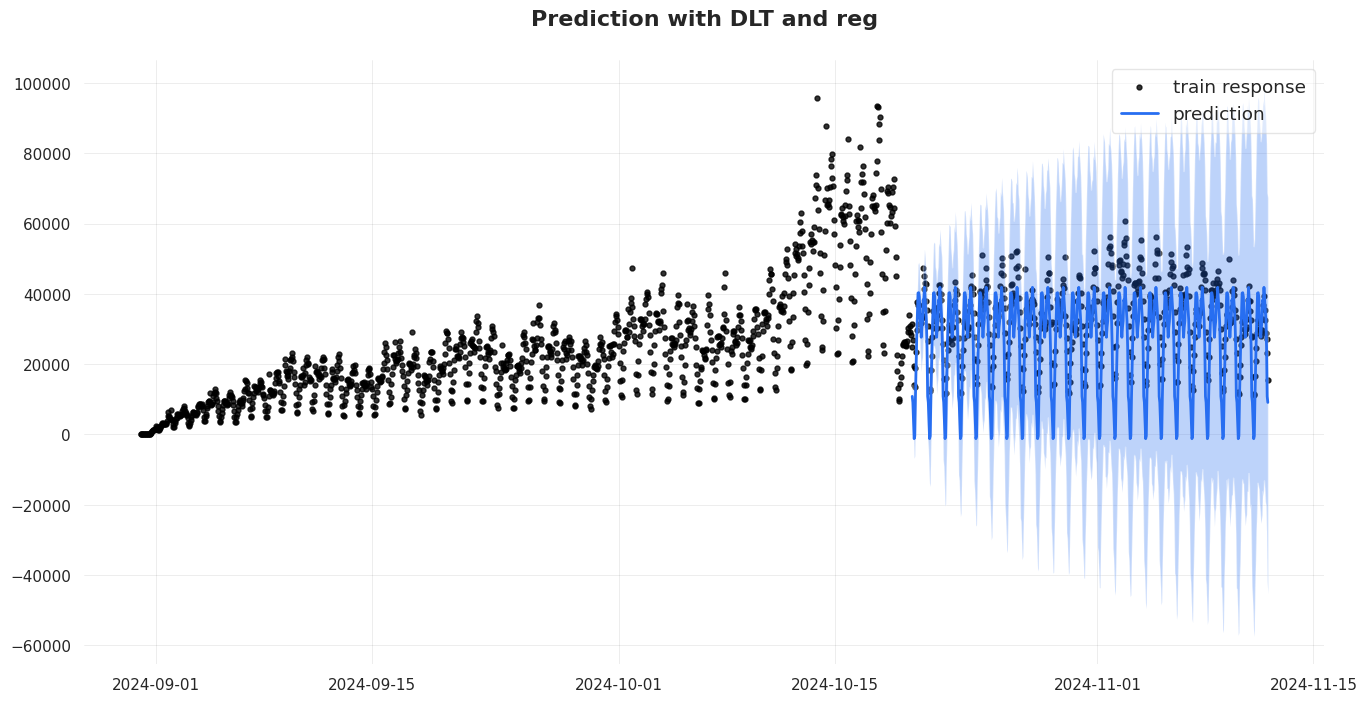

In [95]:
predicted_df_lasso = reg_model_lasso.predict(df=test_dat)

_ = plot_predicted_data(df_flashmob, predicted_df_lasso, "hour_time", 'actions', title='Prediction with DLT and reg')

In [96]:
reg_model_lasso.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,flashmob,Regular,0.0


### Проверка качества моделей

In [97]:
def get_exp_30(model, df):
    bt_exp = BackTester(
    model=model,
    df=df,
    min_train_len=24,
    incremental_len=24,
    forecast_len=24*30,
    window_type="expanding")
    prediction = bt_exp.fit_predict() #обучаем
    score = bt_exp.score() #выводим метрики
    return print(score)

In [98]:
get_exp_30(reg_model_auto, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   4.072415e-01               False
1       wmape   3.587521e-01               False
2        mape   3.544011e-01               False
3         mse   2.261560e+08               False
4         mae   1.056508e+04               False
5       rmsse   3.304106e+00               False


In [99]:
get_exp_30(reg_model_lasso, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   6.362238e-01               False
1       wmape   1.456831e+00               False
2        mape   2.188108e+00               False
3         mse   1.091786e+10               False
4         mae   4.290300e+04               False
5       rmsse   2.295719e+01               False


In [100]:
get_exp_30(reg_model, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   4.036664e-01               False
1       wmape   4.399985e-01               False
2        mape   5.161585e-01               False
3         mse   3.900414e+08               False
4         mae   1.295775e+04               False
5       rmsse   4.339156e+00               False


Плюс/минус все модели ведут себя одинаково. Судя по всему данных нам не хватает на горизонт планирования 30 дней. Думаю, стоит взять неделю.

In [101]:
def get_exp_7(model, df):
    bt_exp = BackTester(
    model=model,
    df=df,
    min_train_len=24,
    incremental_len=24,
    forecast_len=24*7,
    window_type="expanding")
    prediction = bt_exp.fit_predict() #обучаем
    score = bt_exp.score() #выводим метрики
    return print(score)

In [102]:
get_exp_7(reg_model_auto, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   2.769469e-01               False
1       wmape   2.677524e-01               False
2        mape   2.965221e-01               False
3         mse   1.364098e+08               False
4         mae   7.450507e+03               False
5       rmsse   2.686004e+00               False


In [103]:
get_exp_7(reg_model_lasso, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   4.842166e-01               False
1       wmape   4.654609e-01               False
2        mape   7.001508e-01               False
3         mse   5.273455e+08               False
4         mae   1.295196e+04               False
5       rmsse   5.281185e+00               False


In [104]:
get_exp_7(reg_model, df_flashmob)

  metric_name  metric_values  is_training_metric
0       smape   2.777246e-01               False
1       wmape   2.744222e-01               False
2        mape   3.100013e-01               False
3         mse   1.416670e+08               False
4         mae   7.636100e+03               False
5       rmsse   2.737273e+00               False


#### BIC

In [105]:
print(f"Без регрессора MAP: {dlt.get_bic()}")
#print(f"Без регрессора MCMC: {dlt_mcmc.get_bic()}")
print(f"С регрессором: {reg_model.get_bic()}")
print(f"С auto-ridge: {reg_model_auto.get_bic()}")
print(f"С lasso: {reg_model_lasso.get_bic()}")

Без регрессора MAP: 32542.06206661906
С регрессором: 22051.97570101536
С auto-ridge: 22092.094541015358
С lasso: 22052.02326101536


Самый низкий BIC у модели c регрессором. 

Сравним с выводами на тесте через метрику RMSSE:

In [106]:
print(f"Без регрессора: {rmsse(test_dat.actions.values, predicted_df.prediction.values, train_dat.actions.values)}")
print(f"С регрессором: {rmsse(test_dat.actions.values, predicted_df_reg.prediction.values, train_dat.actions.values)}")
print(f"С auto-ridge: {rmsse(test_dat.actions.values, predicted_df_auto.prediction.values, train_dat.actions.values)}")
print(f"С lasso: {rmsse(test_dat.actions.values, predicted_df_lasso.prediction.values, train_dat.actions.values)}")

Без регрессора: 2.2024045591248154
С регрессором: 2.2024045591248154
С auto-ridge: 2.0019319628691985
С lasso: 2.2023604914693644


Что интересно, здесь вывод скорее в пользу auto-ridge! 

**Вывод**: Изучив все модели, сделан вывод, что лучше всего себя ведет модель с auto-ridge. Спрогнозируем теперь действия пользователей на месяц вперед.

#### Предсказание модели

Для начала предскажем значения нашего регрессора - flashmob.

In [107]:
model_flashmob = DLT(
    response_col = 'flashmob',
    date_col = 'hour_time',
    seasonality = 24,
    estimator = 'stan-mcmc',
    num_warmup = 2000,
    num_sample = 1000
)

In [108]:
model_flashmob.fit(df_flashmob)

2024-11-11 22:56:04 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 250.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

In [109]:
future_df_flashmob = model_flashmob.make_future_df(periods=24*30)

In [110]:
flashmob = model_flashmob.predict(future_df_flashmob)

In [111]:
future_df_flashmob = future_df_flashmob.merge(flashmob[['hour_time', 'prediction']])

In [112]:
future_df_flashmob.columns = ['hour_time', 'flashmob']

Теперь спрогнозируем метрику на месяц вперед.

Предиктим:

In [113]:
predicted_df_auto = reg_model_auto.predict(df=future_df_flashmob)
predicted_df_auto.head()

,hour_time,prediction_5,prediction,prediction_95
0,2024-11-12 02:00:00,9267.760699,12448.654530,15673.568313
1,2024-11-12 03:00:00,6256.122995,10282.228922,14442.281097
2,2024-11-12 04:00:00,-348.736564,4595.403314,9346.583328
3,2024-11-12 05:00:00,-5492.478860,-87.822293,5023.692634
4,2024-11-12 06:00:00,-4520.788024,1510.952099,7415.658297


Нарисуем наш прогноз.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

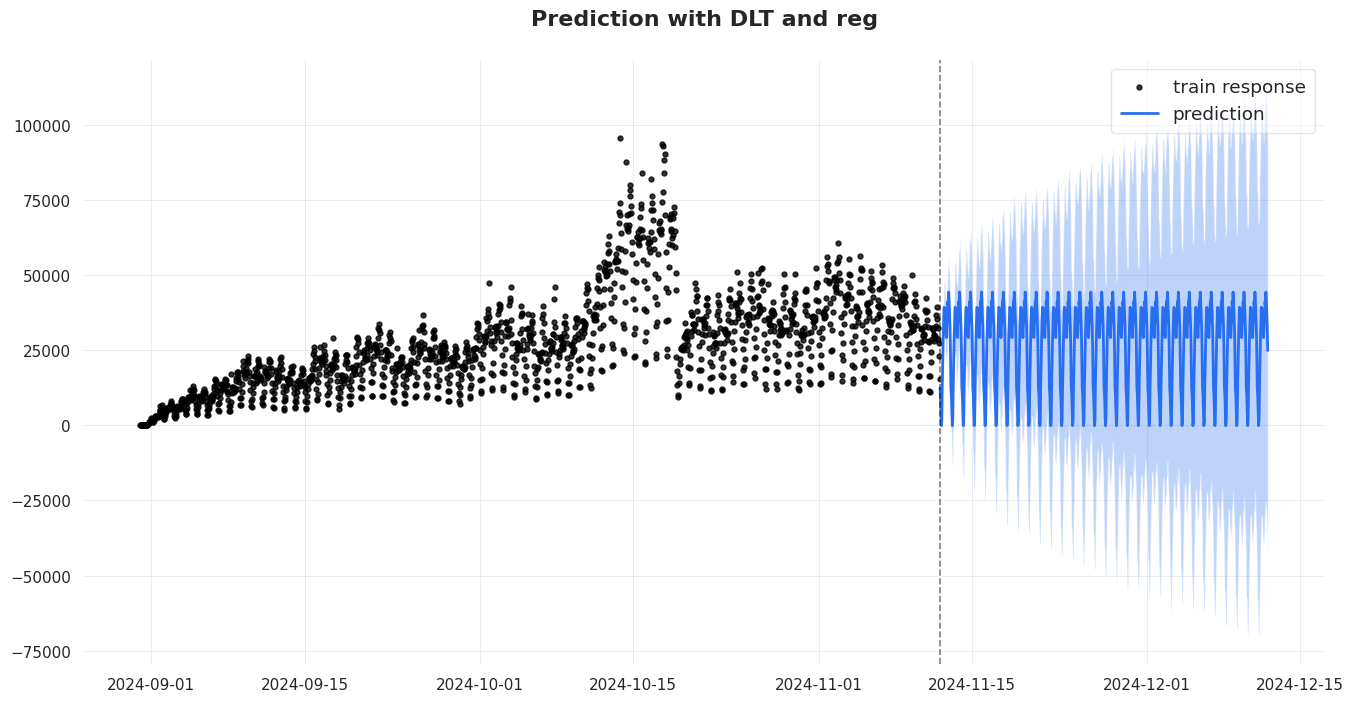

In [114]:
_ = plot_predicted_data(df_flashmob, predicted_df_auto, "hour_time", 'actions', title='Prediction with DLT and reg')

### Выводы

Нами была выбрана основная метрика - действия пользователей, так как чем больше пользователь совершает действий, тем выше нагрузка на сервер. Данные брали за весь период, так как их у нас не много. В качестве регрессора использовали проведение флэшмоба. Так как время проведения флэшмоба было непродолжительным, а его эффект почти сразу перестал влиять, то количество действий пользователей сильно не изменилось.

Были построены и провалидированы модели с регрессорами и без. Самый худший результат показала модель без регрессора. Наиболее удачной оказалась модель с auto-ridge. Данных для бэктестинга с текущей задачей не хватает на горизонт планирования 30 дней. Думаю, стоит взять неделю.


Исходя из из последнего графика, результаты прогноза модели с auto-ridge говорят о том, что тренд относительно действий пользовтателей не изменится.  


